# Predict Customer Clicked Ads Classification By Using Machine Learning

**Project Overview**:
A company in Indonesia wants to know the effectiveness of their advertisements. It is essential for companies operating in the digital marketing consultant sector to find out how successful the advertisements they are marketing are so that they can attract customers to see the advertisements. In this mini project, I am responsible for looking for insights regarding user behaviour from this data by creating visualizations, creating machine learning relevant to the company's needs, and making recommendations from the findings obtained.

**Project Goals**<br>
1. The goal of this project is to help the company in Indonesia to target the right customers for their advertisements.

2. The goal of this project is to increase the conversion rate of the company and also will help the company to increase their profit.<br><br>

**Objective** <br> 
1. Develop classification machine learnig model to predict whether a customer clicked the ads or not.

2. Make business recommendations based on the findings obtained from the data and feature importance from machine learning model.

**Business Metrics**<br>
1. Conversion Rate (CVR) : The percentage of customers who take a desired action. 
2. Profit : The company's profit will increase if the CVR increases.



## Task 1 - Customer Type And Behaviour Analysis On Advertisement
**Task Goals** :<br> Understand the characteristics and behaviors of customers in relation to advertisements.<br><br>

**Task Objective** :<br> 
- EDA (Exploratory Data Analysis) to find insights from the data.
- Univariate analysis to find insights from the data.
- Bivariate analysis to find insights from the data.
- Multivariate analysis to find insights from the data.
- Create visualizations to support the insights.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import f_oneway 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load Dataset & Premilinary Data Checking

In [2]:
df = pd.read_csv('../data/Clicked Ads Dataset.csv')
display(df.sample(4))

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
274,274,73.10,28,399103880.0,242.37,Perempuan,1/25/2016 7:52,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Fashion
571,571,72.76,33,465023090.0,240.63,Laki-Laki,5/10/2016 4:28,No,Palembang,Sumatra Selatan,Furniture
331,331,80.09,31,466457880.0,214.08,Perempuan,5/23/2016 21:00,No,Depok,Jawa Barat,Furniture
611,611,39.50,31,349378750.0,148.19,Laki-Laki,1/28/2016 16:42,Yes,Batam,Kepulauan Riau,Otomotif


### Metadata
Column Name | Description
--- | ---
`Unnamed: 0` | This is an index column.
`daily_time_spent_on_site` | This is a numerical field that represents the amount of time a customer spends on the site daily. It's measured in minutes. 
`age` | This is a numerical field that represents the age of the customer.
`area_income` | This is a numerical field that represents the income of the area where the user lives. It's measured in Indonesian Rupiah.
`daily_internet_usage` | This is a numerical field that represents the amount of time a user spends on the internet daily. It's measured in minutes.
`gender` | This is a categorical field that represents the gender of the user. It's in Indonesian, with "Perempuan" meaning female and "Laki-Laki" meaning male.
`timestamp` | This is a datetime field that represents when the user clicked on the ad. It's in the format of month/day/year hour:minute.
`clicked_on_ad` | This is a categorical field that represents whether the user clicked on the ad. "No" means the user did not click on the ad.
`city` | This is a categorical field that represents the city where the user lives.
`province` | This is a categorical field that represents the province where the user lives.
`ad_category` | This is a categorical field that represents the category of the ad.

### EDA
Before we start to do EDA, we need to change the column name that not appropriate for better interpretation in analysis and column name consistency.

In [3]:
# Create a copy of the DataFrame to not modify the original DataFrame
dfe = df.copy()

# define a dictionary of column names to rename
col_rename = {'Daily Time Spent on Site': 'daily_time_spent_on_site',
              'Age' : 'age',
              'Area Income': 'income',
              'Daily Internet Usage': 'daily_internet_usage',
              'Male':'gender',
              'Timestamp':'timestamp',
              'Clicked on Ad':'clicked_on_ad',
              'category' : 'ad_category'
}

# rename columns
dfe.rename(columns=col_rename, inplace=True)

In [4]:
# Display the infromation about the DataFrame
print("DataFrame Information:")
dfe.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   daily_time_spent_on_site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   income                    987 non-null    float64
 4   daily_internet_usage      989 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked_on_ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  ad_category               1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


the df.info() output is give information about:


From the dataframe information below, we can see that:
- The data has 11 columns and 1000 rows.
- The data has 3 data types, which are int64, float64, and object.
- The data has missing values in `daily_time_spent_on_site`, `area_income`, `daily_internet_usage`, `Gender`
- `Male` column should be changed to `Gender` column.
- `Unnamed: 0` is an index column.(this column will be dropped later).
- and other column names should be changed for column name consistency.

#### Statistical Descriptive

In [5]:
# Display the summary statistics of numerical columns
numericals = dfe.select_dtypes(['int64', 'float64'])
categoricals = dfe.select_dtypes(['object'])

print("Numerical Columns Sumarry Statistics:")
display(numericals.describe().T)

print("\nCategorical Columns Summary Statistics:")
display(categoricals.describe().T)

Numerical Columns Sumarry Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
daily_time_spent_on_site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
daily_internet_usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02



Categorical Columns Summary Statistics:


,count,unique,top,freq
gender,997,2,Perempuan,518
timestamp,1000,997,5/26/2016 15:40,2
clicked_on_ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
ad_category,1000,10,Otomotif,112


Upon the **Numerical Column Statistics Summary** i found that:
- The mean of all numerical columns are not too far from the median, which means the data is not too skewed.
- `daily_time_spent_on_site` minimum is 32.60 minutes and maximum is 91.43 minutes, this means that from all our customers, the minimum time they spent on our site is 32.60 minutes and the maximum time they spent on the site is 91.43 minutes.
- `age` minimum Age is 19 and maximum Age is 61 (this information will be helpfull for binning the Age column later).
- Minimum `income` is 13996.50 and maximum `income` is 79484.80.
- Minimum `daily_internet_usage` is 104.78 and maximum `daily_internet_usage` is 269.96, this means that from all our customers, the minimum time they spent on the internet is 104.78 minutes and the maximum time they spent on the internet is 269.96 minutes.<br><br>

Upon the **Categorical Column Statistics Summary** i found that:
- Top `gender` in our data is Female(Perempuan) with 518 frequency.(this columns contains missing values).
- Top `timestamp` in our data is 2016-03-27 00:53:11 with 2 frequency.
- `clicked_on_ad` is our target column, and the value of yes and no is balanced (50:50). 
- Top `city` in our data is Surabaya with 64 frequency.
- Top `province` where the customer lives in our data is Daerah Khusus Ibukota Jakarta with 253 frequency.
- Top `ad_category` that the customer clicked in our data is Automotive with 170 frequency.

#### Missing Values Checking

In [6]:
missing_data = dfe.isna().sum()
missing = missing_data[missing_data > 0]


missing_percentage = (dfe.isna().sum() / len(dfe)) * 100
percentage = missing_percentage[missing_percentage > 0]
percentage = percentage.map('{:.2f}%'.format)

print('Missing Data:')
display(missing)
print('\nMissing Data Percentage:')
display(percentage)

Missing Data:


daily_time_spent_on_site    13
income                      13
daily_internet_usage        11
gender                       3
dtype: int64


Missing Data Percentage:


daily_time_spent_on_site    1.30%
income                      1.30%
daily_internet_usage        1.10%
gender                      0.30%
dtype: object

Missing values on this dataset is under 5% so i will decide after EDA process.

#### Duplicate checking

In [7]:
print('Duplicate Rows:')
dfe.duplicated().sum()

Duplicate Rows:


0

the dataset has 0 duplicate rows.

#### Visualization

##### Univariate Analysis

**Categorical Data**

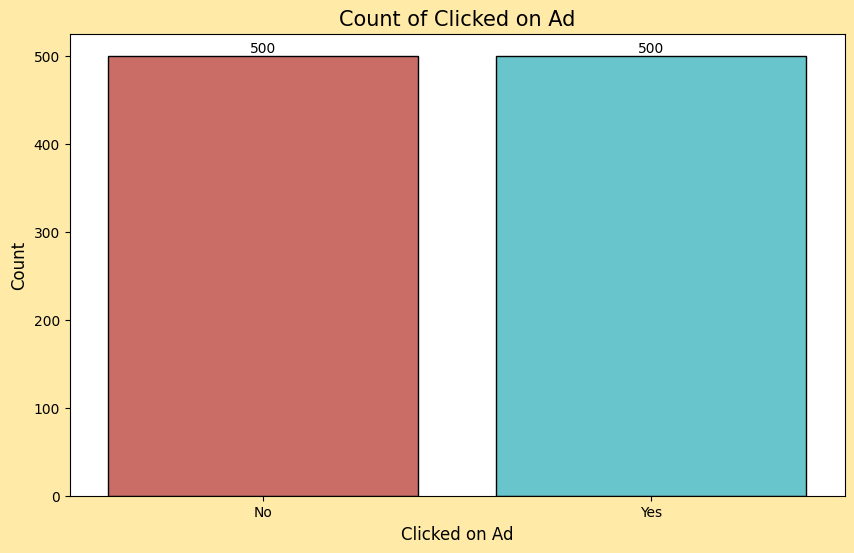

In [8]:
plt.figure(figsize=(10,6), facecolor='#FFEAA7')
bar = sns.countplot(x='clicked_on_ad', data=dfe, palette='hls', edgecolor='black')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
bar.set_title('Count of Clicked on Ad', fontsize=15)
bar.set_xlabel('Clicked on Ad', fontsize=12)
bar.set_ylabel('Count', fontsize=12)
plt.show()

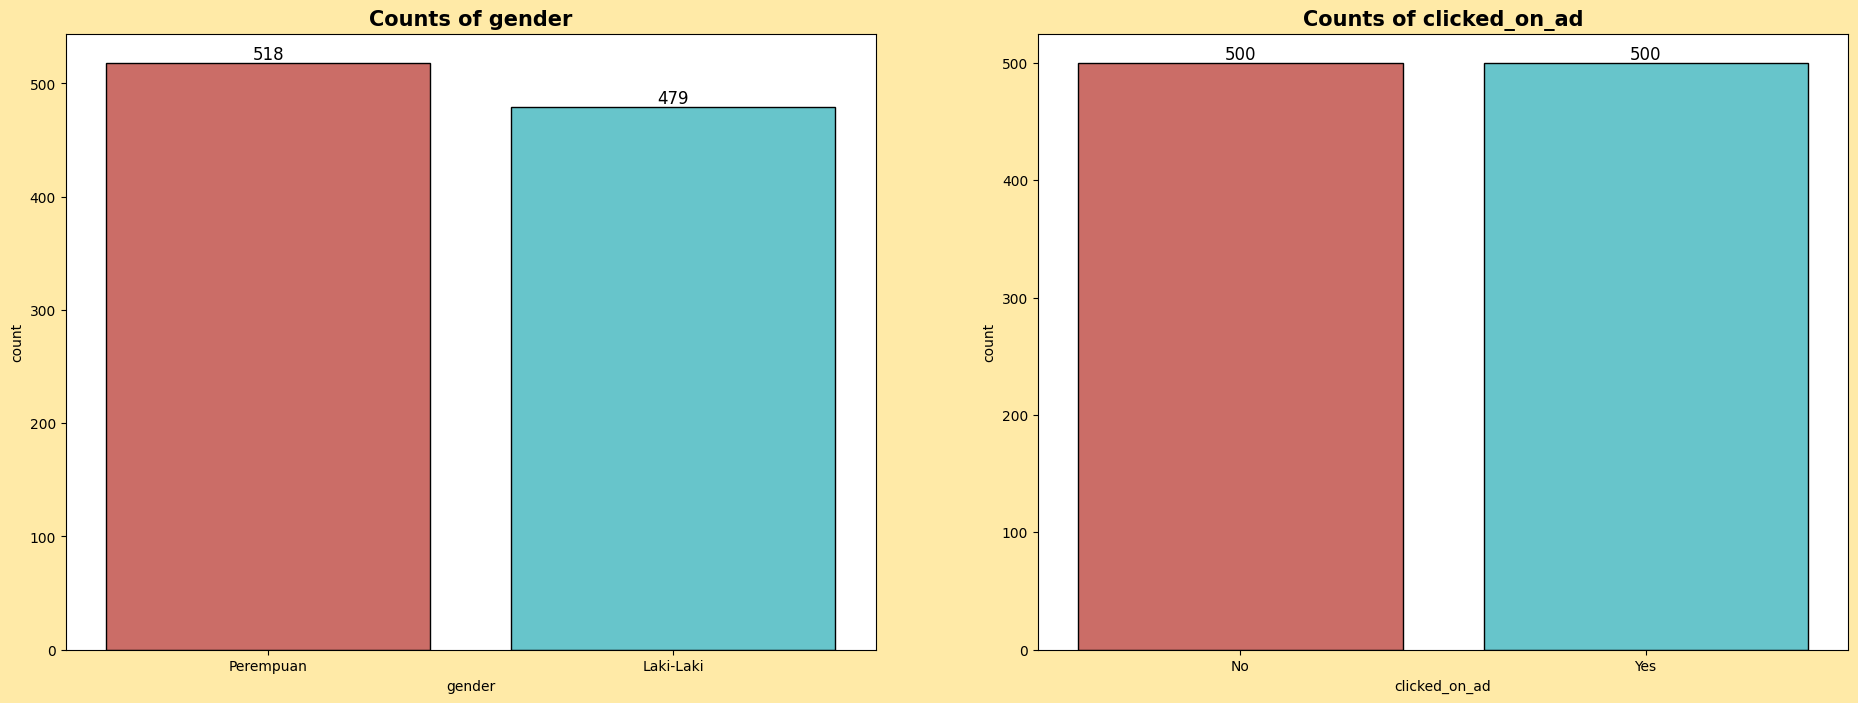

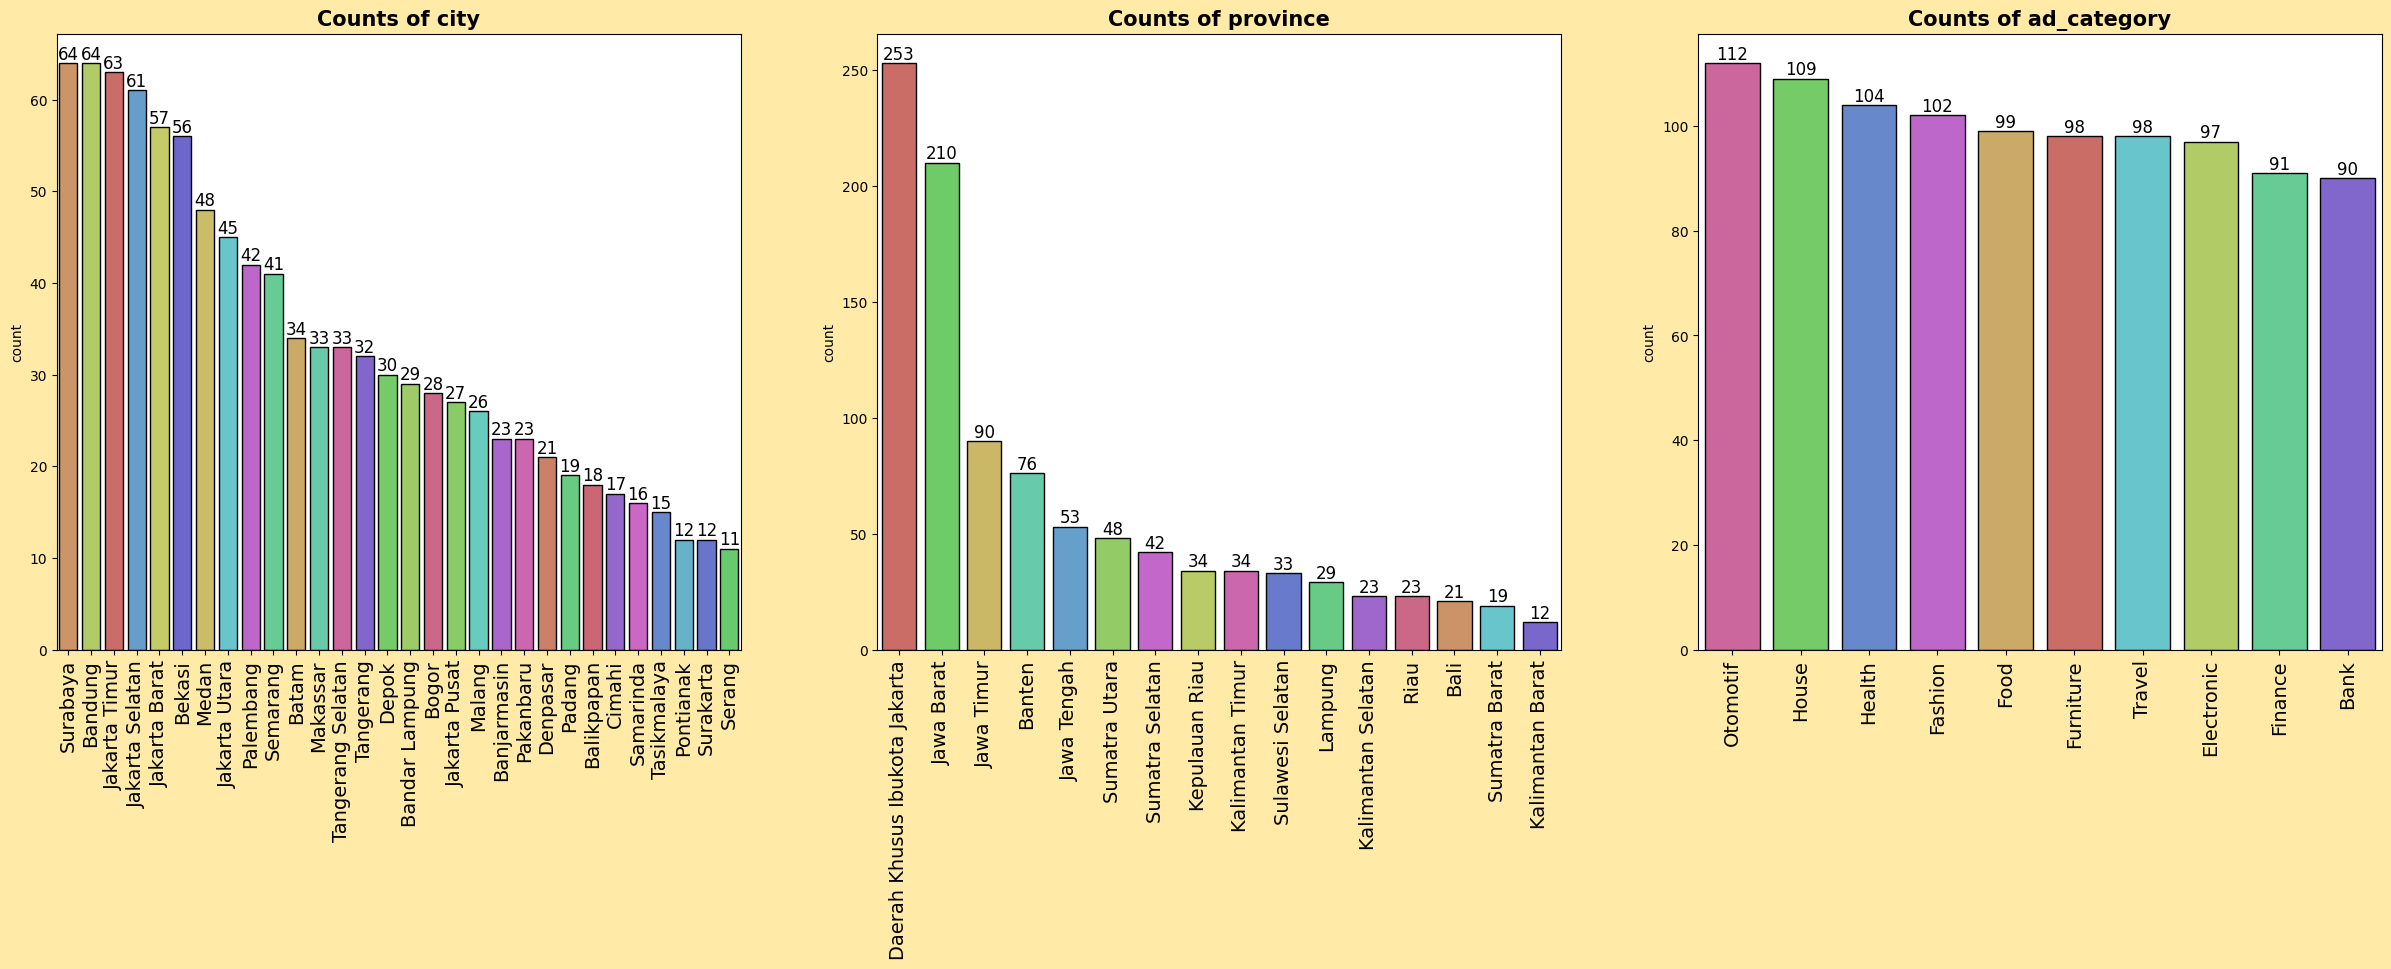

In [9]:
lowvar = dfe[['gender', 'clicked_on_ad']]
highvar = dfe[['city', 'province', 'ad_category']]

fig, ax = plt.subplots(1, 2, figsize=(23, 8))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=i, legend=False, palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}', fontsize=15, fontweight='bold')
    for p in subplot.patches:
        subplot.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.set_facecolor('#FFEAA7')

city_order = dfe['city'].value_counts().index
prov_order = dfe['province'].value_counts().index
ad_order = dfe['ad_category'].value_counts().index
gen_order = dfe['gender'].value_counts().index

for i, subplot in zip(highvar.columns, ax.flatten()):
    sns.countplot(
        x=i,
        data=highvar,
        ax=subplot, hue=i,
        legend=False,
        palette='hls',
        edgecolor='black',
        order=city_order if i == 'city' else prov_order if i == 'province' else ad_order
)
    subplot.set_title(f'Counts of {i}', fontsize=15, fontweight='bold')
    subplot.set_xlabel('')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        label.set_fontsize(14)
        
    for p in subplot.patches:
        subplot.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

From the univariate analysis of categorical data, we can infer that:
- The distribution of genders in our data is almost balanced, with a slightly higher number of females (Perempuan) than males (Laki-laki).
- The 'clicked_on_ad' (target) is balanced, indicating an equal propensity for customers to click or not click on an ad.
- The 'Automotive' category is the most clicked ad category, suggesting that our customers have a high interest in this sector.
- The majority of our customers reside in Surabaya and Bandung, indicating a potential market focus in this area.
- The province with the highest number of customers is 'Daerah Khusus Ibukota Jakarta', suggesting a significant customer base in this region.

**Numerical Data**

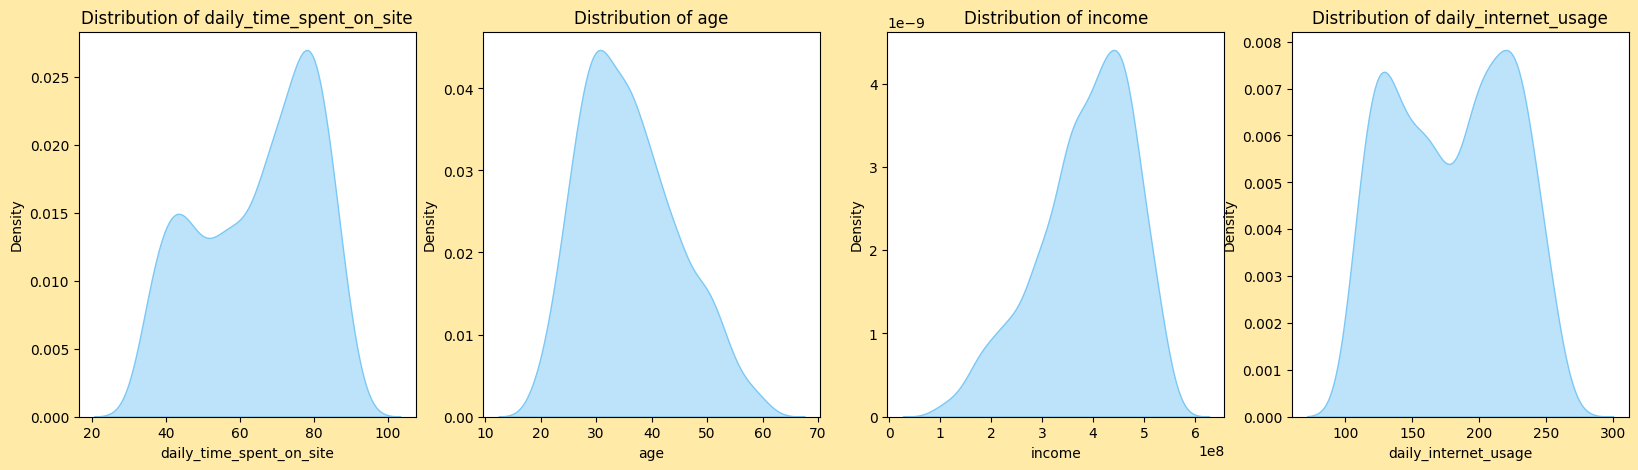

In [10]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage']]
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.kdeplot(x=i, data=num, ax=subplot, color='xkcd:lightblue', fill=True, alpha=0.5)
    subplot.set_title(f'Distribution of {i}')

Summary findings from the univariate analysis of numerical data:
- The data distribution mostly a little bit skewed
- The `daily_internet_usage` data distribution is considered bimodal, with two peaks at around 120 and 240 minutes.

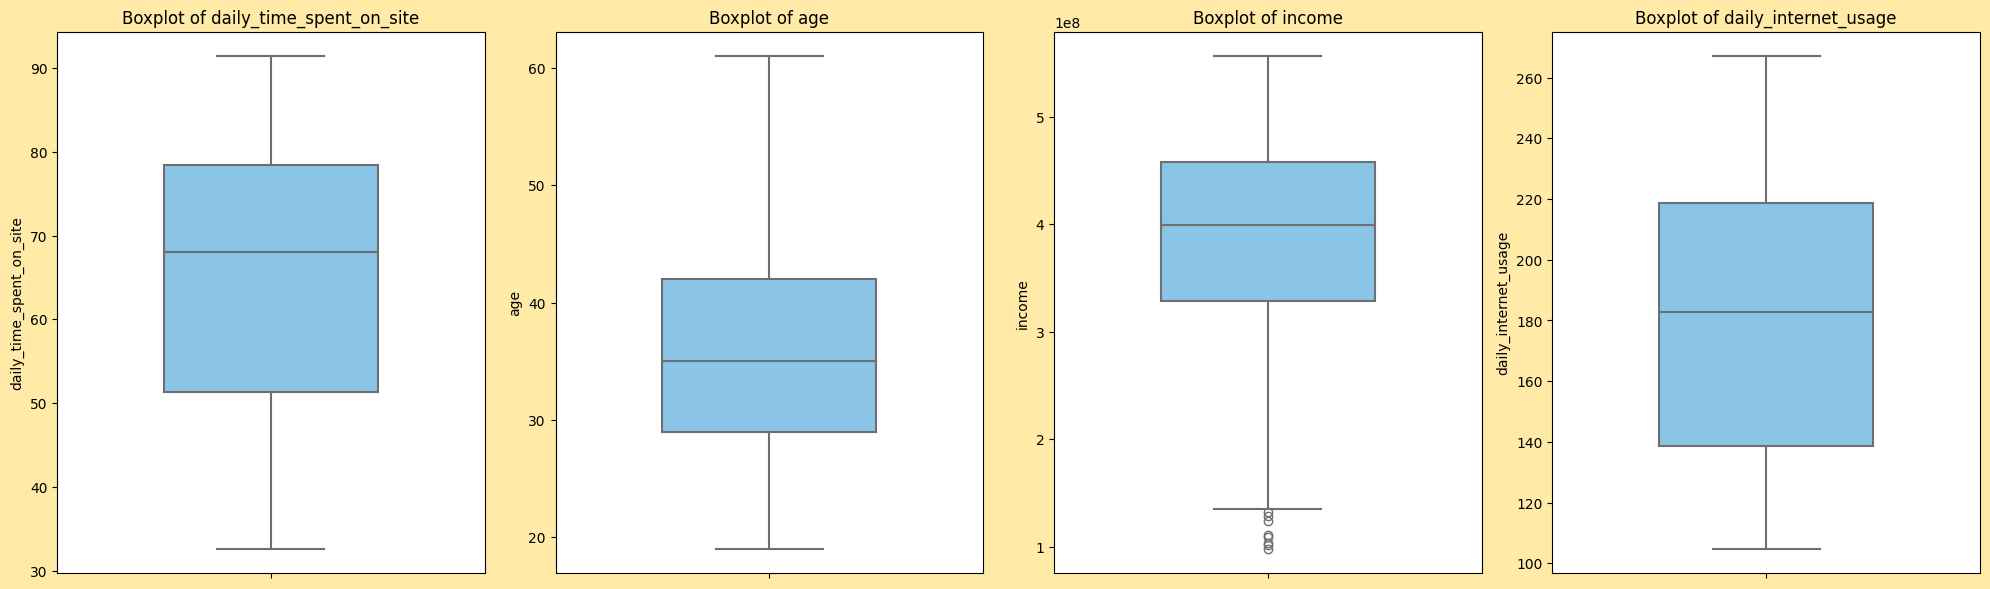

In [11]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage']]
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.boxplot(y=i, data=num, ax=subplot, color='xkcd:lightblue', width=0.5, linewidth=1.5)
    subplot.set_title(f'Boxplot of {i}')

fig.tight_layout()

From the boxplot above, we can infer that There's no outliers in our data.

##### Bivariate Analysis

**Categorical Data**

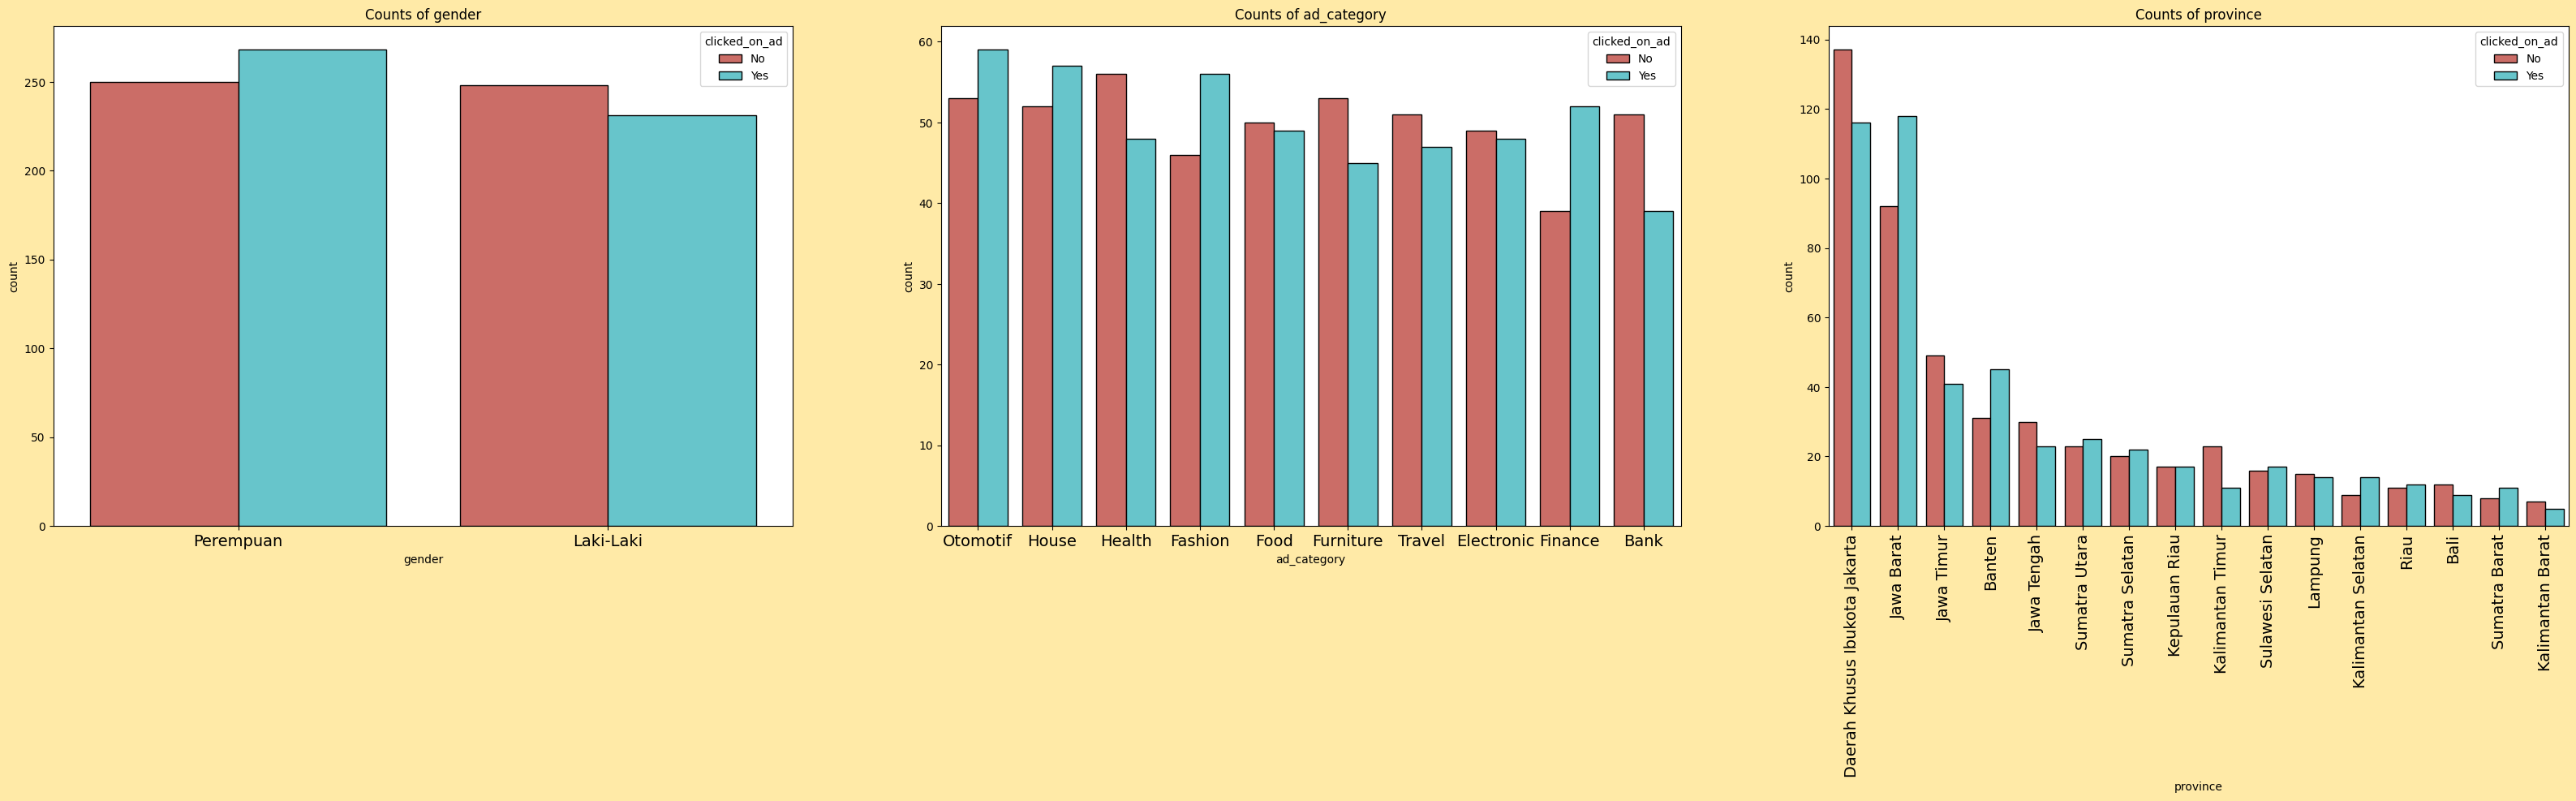

In [12]:
cat_bi = dfe[['gender','ad_category', 'province']]

fig, ax = plt.subplots(1, 3, figsize=(40, 8))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(cat_bi.columns, ax.flatten()):
    sns.countplot(
        x=i,
        data=cat_bi,
        ax=subplot,
        hue=dfe['clicked_on_ad'],
        palette='hls',
        edgecolor='black',
        order=gen_order if i == 'gender' else prov_order if i == 'province' else ad_order)
    subplot.set_title(f'Counts of {i}')
    subplot.tick_params(axis='x', labelsize=14)
    if i not in ['gender', 'ad_category']:
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

From the bivariate analysis of categorical data, we can infer that:
- Females more likely click on ads than males.
- Customers who live in Bandung are more likely to click on ads than customers who live in other cities.
- Customers who live in Daerah Khusus Ibukota Jakarta are not more likely to click on ads than customers who live in other provinces.
- Customers who live in Jawa Barat are more likely to click on ads than customers who live in other provinces.

**Numerical Data**

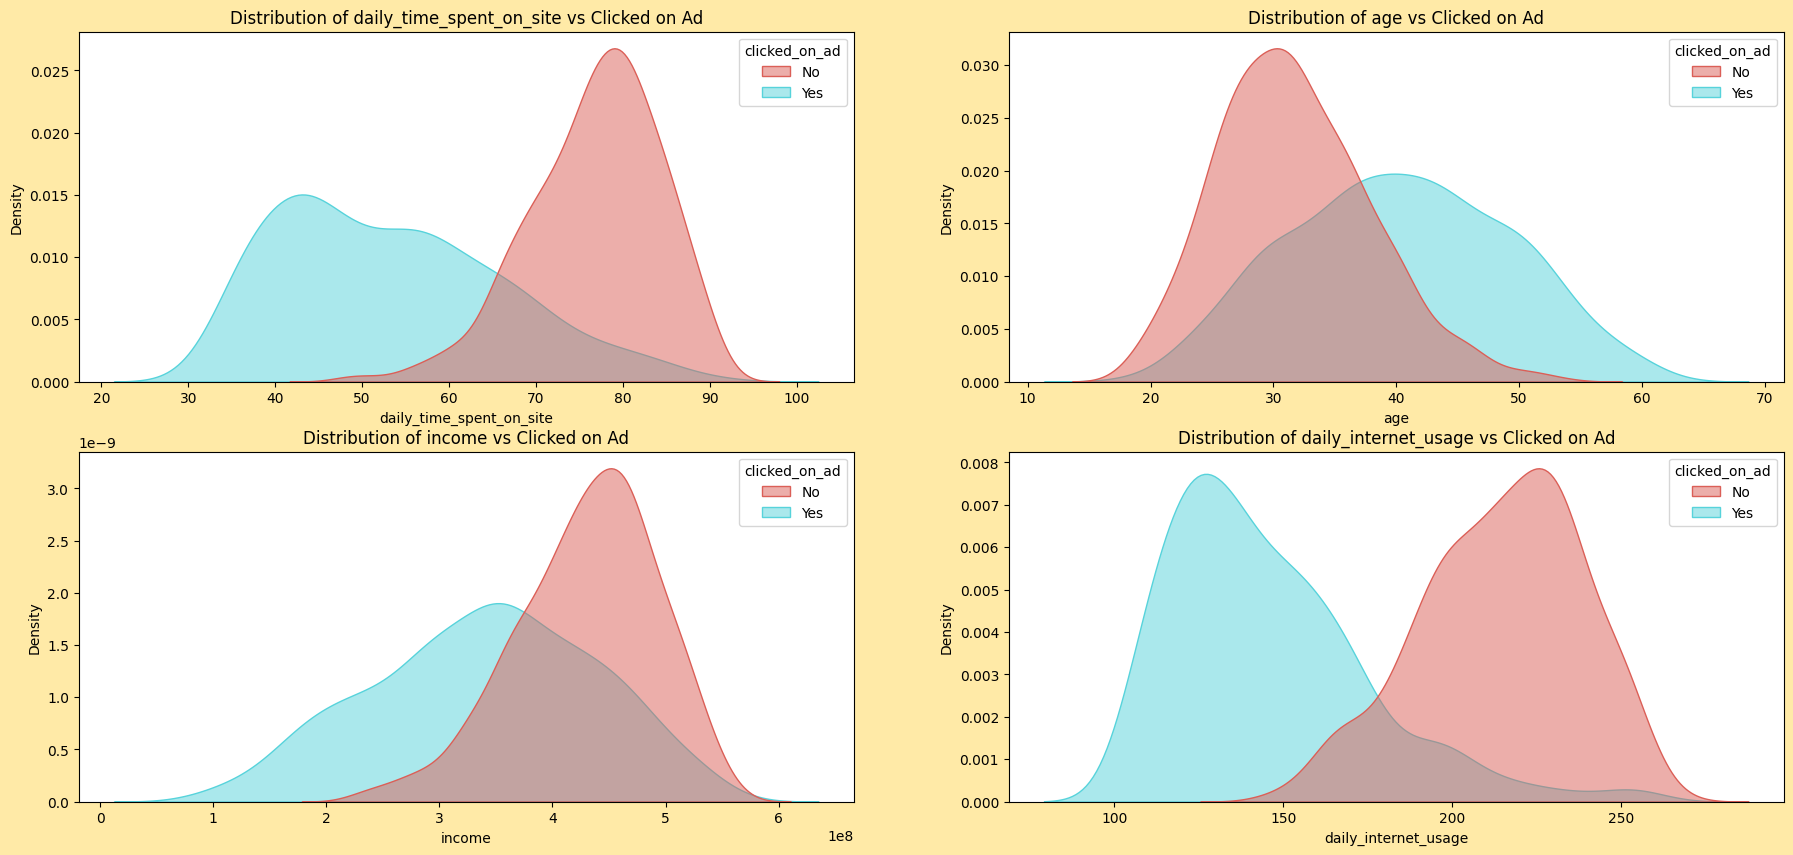

In [13]:
num = dfe[['daily_time_spent_on_site', 'age', 'income', 'daily_internet_usage', 'clicked_on_ad']]
fig, ax = plt.subplots(2, 2, figsize=(22,10))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.kdeplot(x=i, data=num, hue=dfe['clicked_on_ad'], palette='hls', fill=True, alpha=0.5, ax=subplot)
    subplot.set_title(f'Distribution of {i} vs Clicked on Ad')

from the bivariate analysis with kdeplot above we can infer that:<br>

- The highest density of customers who clicked on ads is daily time spent on site at around 40 minutes, while the highest density of visitors who did not click on ads is spent time on site around 80 minutes. This suggests that customers who click on ads are more likely to spend 40 minutes or more on the site, while customers who do not click on ads are more likely to spend 80 minutes or less on the site. (customer that spend less time means they really open the side for the purpose of clicking the ads or they just open the site for other purpose. for the people spent more time on the site they might be just browsing the site and not really interested in the ads).<br><br>

- The highest density of customers who clicked on ads is daily internet usage at around 115 minutes, while the highest density of customers who did not click on ads is daily internet usage at around 210 minutes. This suggests that customers who click on ads are more likely to spend 115 minutes or less on the internet, while customers who do not click on ads are more likely to spend 210 minutes or more on the internet.<br><br>

- Customers who are younger tend to not click on ads than customers who are older.<br><br>
- Customers who have a higher income tend to not click on ads than customers who have a lower income.

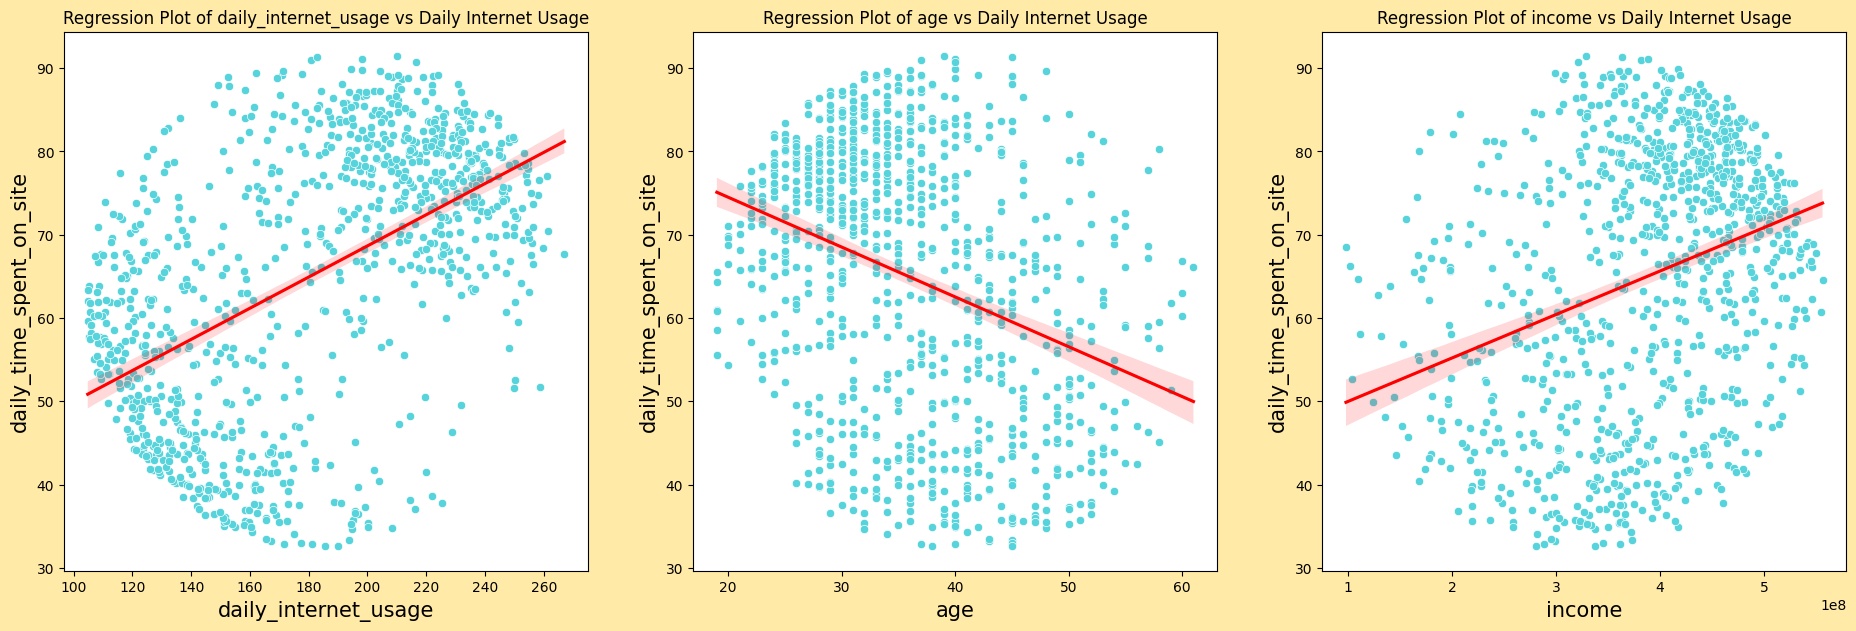

In [14]:
corrl = ['daily_internet_usage', 'age', 'income']

fig, ax = plt.subplots(1, 3, figsize=(23, 7))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(corrl, ax.flatten()):
    sns.scatterplot(x=i, y='daily_time_spent_on_site', data=dfe, ax=subplot, color='#57d3db')
    sns.regplot(x=i, y='daily_time_spent_on_site', data=dfe, ax=subplot, color='red', scatter=False)
    subplot.set_title(f'Regression Plot of {i} vs Daily Internet Usage')
    subplot.set_xlabel(i, fontsize=15)
    subplot.set_ylabel('daily_time_spent_on_site', fontsize=15)

From the Regression plot above, we can infer that:
- There is a positive between daily time spent on site and daily internet usage, This suggests that customers who spend more time on the site also tend to use the internet more frequently.
- There is a negative correlation between daily time spent on site and age, which means that the younger the customer, the more time they spend on the site. This indicates that younger customers are likely to spend more time on the site compared to older ones.
- There is a positive correlation between daily time spent on site and income, which means that the higher the income, the more time a customer spends on the site. This implies that customers with higher income levels tend to spend more time on the site.

##### Multivariate Analysis

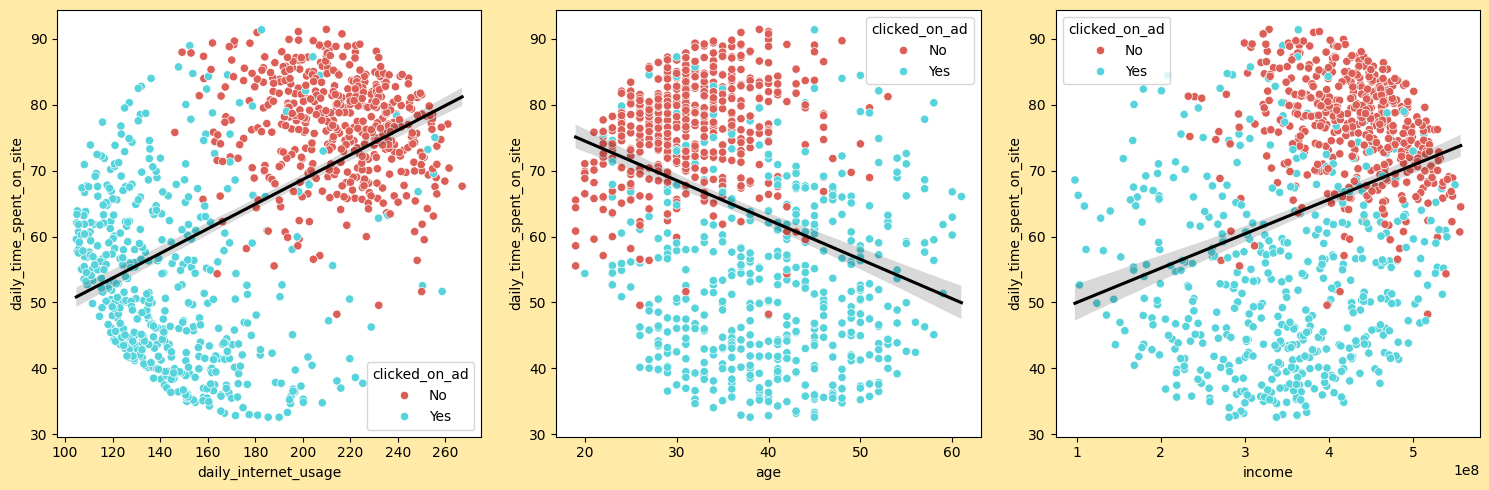

In [15]:
# Define the features to be plotted
corrl = ['daily_internet_usage', 'age', 'income']

# Create a subplot with 1 row and as many columns as there are features
fig, axs = plt.subplots(1, len(corrl), figsize=(15, 5))

# Set the background color of the figure
fig.set_facecolor('#FFEAA7')

# Loop over each feature
for i, feature in enumerate(corrl):
    # Create a scatterplot of the feature against 'daily_internet_usage', colored by 'clicked_on_ad'
    sns.scatterplot(x=feature, y='daily_time_spent_on_site', hue='clicked_on_ad', data=dfe, palette='hls', ax=axs[i])
    
    # Overlay a regression plot on the scatterplot, without the scatter points (scatter=False)
    sns.regplot(x=feature, y='daily_time_spent_on_site', data=dfe, scatter=False, color='black', ax=axs[i])

# Adjust the layout to fit the plots properly
plt.tight_layout()

# Display the plots
plt.show()

From the regplot before we saw the correlation between 2 variables, now we will see the correlation between 3 variables, the 3rd variable is the target variable.<br>
now on this regplot above, We can infer that:
- As said before, there's positive correlation between daly time spent on site and daily internet usage, on this plot we can see that customer who not clicked on the ads are more likely to spend more time on the site and use the internet more frequently than customer who clicked on the ads,

- Customer who clicked on the ads are more likely to be older than customer who not clicked on the ads,

- and customer who clicked on the ads are more likely to have lower income than customer who not clicked on the ads.

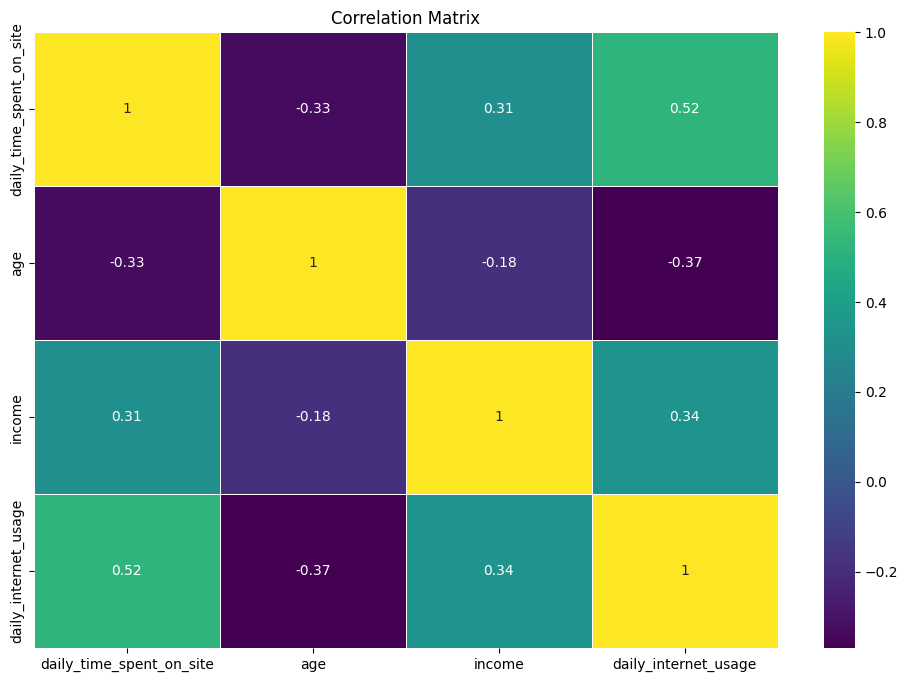

In [16]:
numnw = num.drop('clicked_on_ad', axis=1)
plt.figure(figsize=(12, 8))
plt.facecolor='#FFEAA7'
sns.heatmap(numnw.corr(), annot=True, cmap='viridis', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

On this heatmap correlation we can see the correlation more clearly, we can infer the featrues that have correlation more than 0.5 and less than -0.5, which are:
- There is Moderate Positive Correlation between `daily_time_spent_on_site` and `daily_internet_usage` with correlation value 0.52.
- There is Weak Negative Correlation between `age` and `daily_internet_usage` with correlation value -0.37.
- There is Weak Positive Positive Correlation between `income` and `daily_internet_usage` with correlation value 0.34.

### Task 2 - Data Preprocessing
**Task Goals** :<br> Clean the data and prepare it for the machine learning process.<br><br>
**Task Objective** :<br>
- Handle missing values.
- Feature Engineering.
- Feature Selection.
- Feature Encoding.
- Splitting the data.

#### Handling Missing Values

In [17]:
# before preprocessing the data, let's create a copy of the DataFrame
dfp = dfe.copy()

# handle missing values
med_time = dfp['daily_time_spent_on_site'].median()
dfp['daily_time_spent_on_site'].fillna(med_time, inplace=True)

med_income = dfp['income'].median()
dfp['income'].fillna(med_income, inplace=True)

med_internet = dfp['daily_internet_usage'].median()
dfp['daily_internet_usage'].fillna(med_internet, inplace=True)

# handle categorical variables
mod_gen = dfp['gender'].mode()[0]
dfp['gender'].fillna(mod_gen, inplace=True)

print('Checking if there are any missing values left:')
print(dfp.isna().sum())
print('\n No missing values left')

Checking if there are any missing values left:
Unnamed: 0                  0
daily_time_spent_on_site    0
age                         0
income                      0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
ad_category                 0
dtype: int64

 No missing values left


### Feature Engineering

[Age Grouping Binning Preferences](https://www.quanthub.com/power-bi-group-and-bin-data/#:~:text=Binning%20is%20a%20technique%20used,to%20analyze%20trends%20more%20effectively).

In [18]:
# Define age groups based on age ranges
age_group = [
    (dfp['age'] >= 51),
    (dfp['age'] >= 36) & (dfp['age'] < 51),
    (dfp['age'] >= 19) & (dfp['age'] < 36)
]
age_binning = ['Old Adults', 'Middle Adults', 'Young Adults']

# Create a new column 'age_group' by selecting the appropriate age group for each row
dfp['age_group'] = np.select(age_group, age_binning)

# Convert 'timestamp' column to datetime type
dfp['timestamp'] = pd.to_datetime(dfp['timestamp'])

# Extract month, day, hour, and minute from 'timestamp' and create new columns for each
dfp['month_ad_clicked'] = dfp['timestamp'].dt.month.astype('int64')
dfp['day_ad_clicked'] = dfp['timestamp'].dt.day.astype('int')
dfp['hour_ad_clicked'] = dfp['timestamp'].dt.hour.astype('int')
dfp['minute_ad_clicked'] = dfp['timestamp'].dt.minute.astype('int')

# Create a new column 'is_weekend' that indicates whether the ad was clicked on a weekend
dfp['is_weekend'] = dfp['timestamp'].dt.weekday >= 5
dfp['is_weekend'] = dfp['is_weekend'].astype('object')

# Define a mapping from specific provinces to more general regions
province_mapping = {
    'Daerah Khusus Ibukota Jakarta': 'DKI Jakarta',
    'Jawa Timur': 'Jawa',
    'Jawa Barat': 'Jawa',
    'Jawa Tengah': 'Jawa',
    'Kepulauan Riau': 'Sumatra',
    'Sumatra Utara': 'Sumatra',
    'Sumatra Selatan': 'Sumatra',
    'Sumatra Barat': 'Sumatra',
    'Riau': 'Kepulauan Riau',
    'Kepulauan Riau': 'Kepulauan Riau',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Barat': 'Kalimantan'
}

# Replace the values in the 'province' column based on the province_mapping dictionary
dfp['province'] = dfp['province'].replace(province_mapping)

### Feature Selection

#### Chi square test
to Detects statistical significance level of the relationship between categorical features and target.

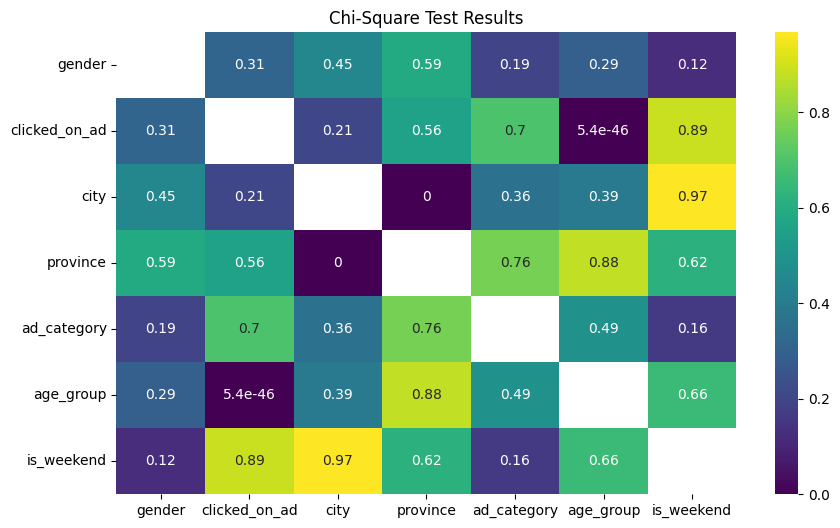

In [19]:
# Select categorical columns from the DataFrame
cat = dfp.select_dtypes(include='object')

# Create an empty DataFrame with the categorical columns as both the index and columns
chi2_df = pd.DataFrame(index=cat.columns, columns=cat.columns)

# Loop over each pair of columns in the DataFrame
for i in cat.columns:
    for j in cat.columns:
        # Skip if the columns are the same
        if i != j:
            # Create a contingency table for the pair of columns
            contingency_table = pd.crosstab(cat[i], cat[j])
            # Perform a Chi-Square test of independence and get the p-value
            chi2_val, p_val, _, _ = chi2_contingency(contingency_table)
            # Store the p-value in the DataFrame
            chi2_df.loc[i, j] = p_val

# Convert the DataFrame to numeric
chi2_df = chi2_df.apply(pd.to_numeric)

# Create a heatmap of the p-values
plt.figure(figsize=(10,6)) 
sns.heatmap(chi2_df, annot=True, cmap='viridis')

# Add a title to the plot
plt.title('Chi-Square Test Results')

# Display the plot
plt.show()

From the Chi Square test result above, we can infer that:
- The p-value of `clicked_on_ad` and `age_grop` is extremely small (5.4e-46), indicating a strong relationship between theese two variables.
- Most other p-values are greater than 0.05, suggesting that those pairs of variables are likely independent. For example, the p-value between `gender` and `clicked_on_ad` is 0.311145, suggesting no significant relationship between gender and wether an ad was clicked.
- The p-value between `city` and `province` is 0, indicating a strong relationship. This make sense, as cities are located within provinces.

#### ANOVA Test
to Detects statistical significance level of the relationship between numerical features and target.

In [20]:
# # Get the list of numerical columns
# numerical_columns = dfp.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# # Initialize an empty DataFrame to store the results 
# annova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Significant'])

# # perform ANOVA for each numerical column
# for i, column in enumerate(numerical_columns):
#     groups = dfp.groupby('clicked_on_ad')[column].apply(list)
#     f_stat, p_value = stats.f_oneway(*groups)

#     # Determine whether the correlation is significant
#     significant = 'Yes' if p_value <= 0.05 else 'No'

#     # Add the results to the DataFrame
#     annova_results.loc[i] = [column, f_stat, p_value, significant]


# # Sort the DataFrame by the F-statistic in descending order
# annova_results = annova_results.sort_values('F-statistic', ascending=False)

# # Create a bar plot of the F-statistics
# plt.figure(figsize=(10, 6), facecolor='#FFEAA7')
# sns.barplot(x='F-statistic', y='Feature', data=annova_results, palette='hls')
# plt.title('ANOVA F-statistics for Numerical Features')
# plt.xlabel('F-statistic')
# plt.ylabel('Feature')
# plt.show()

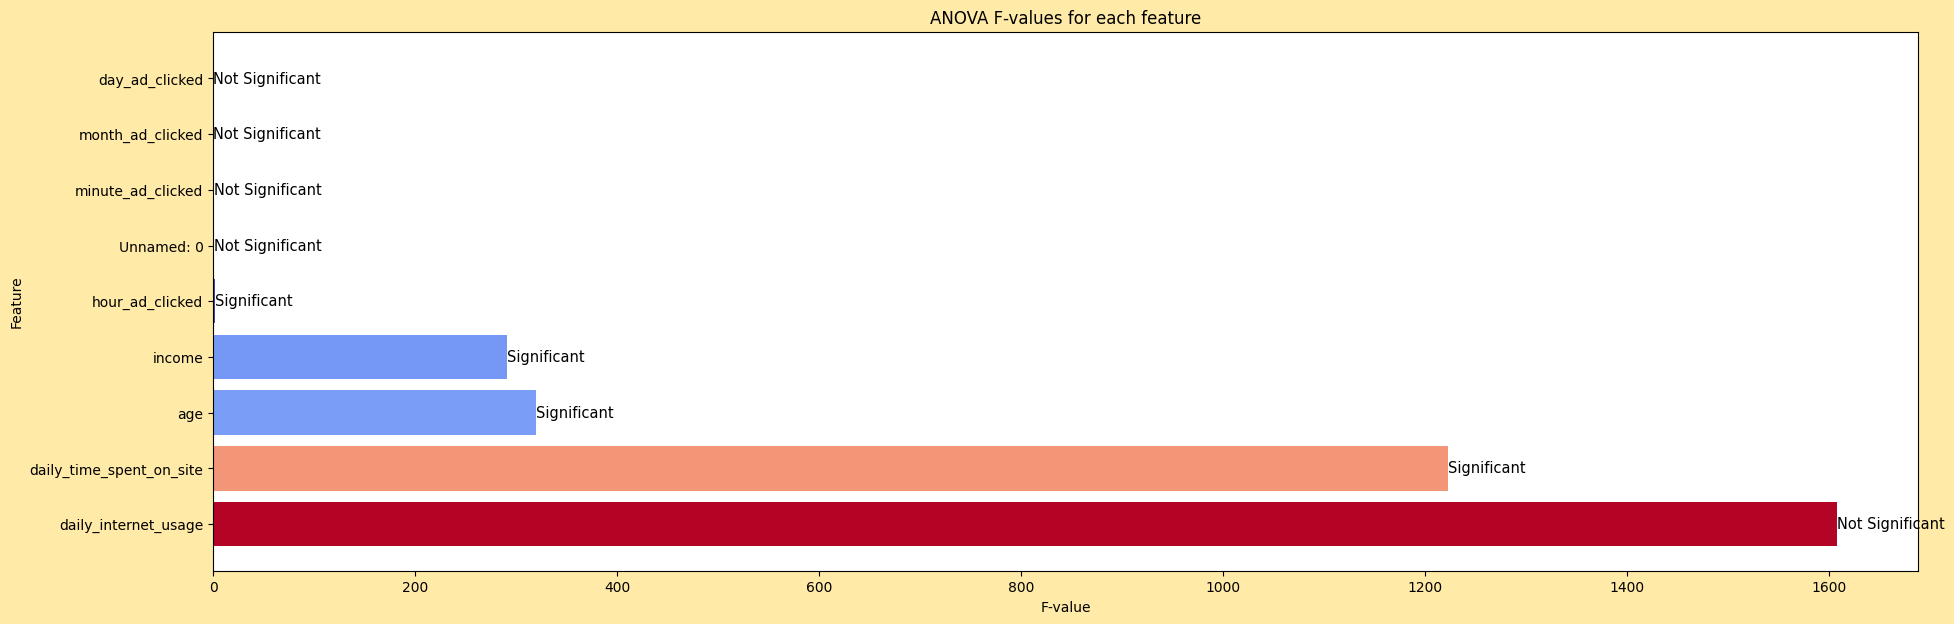

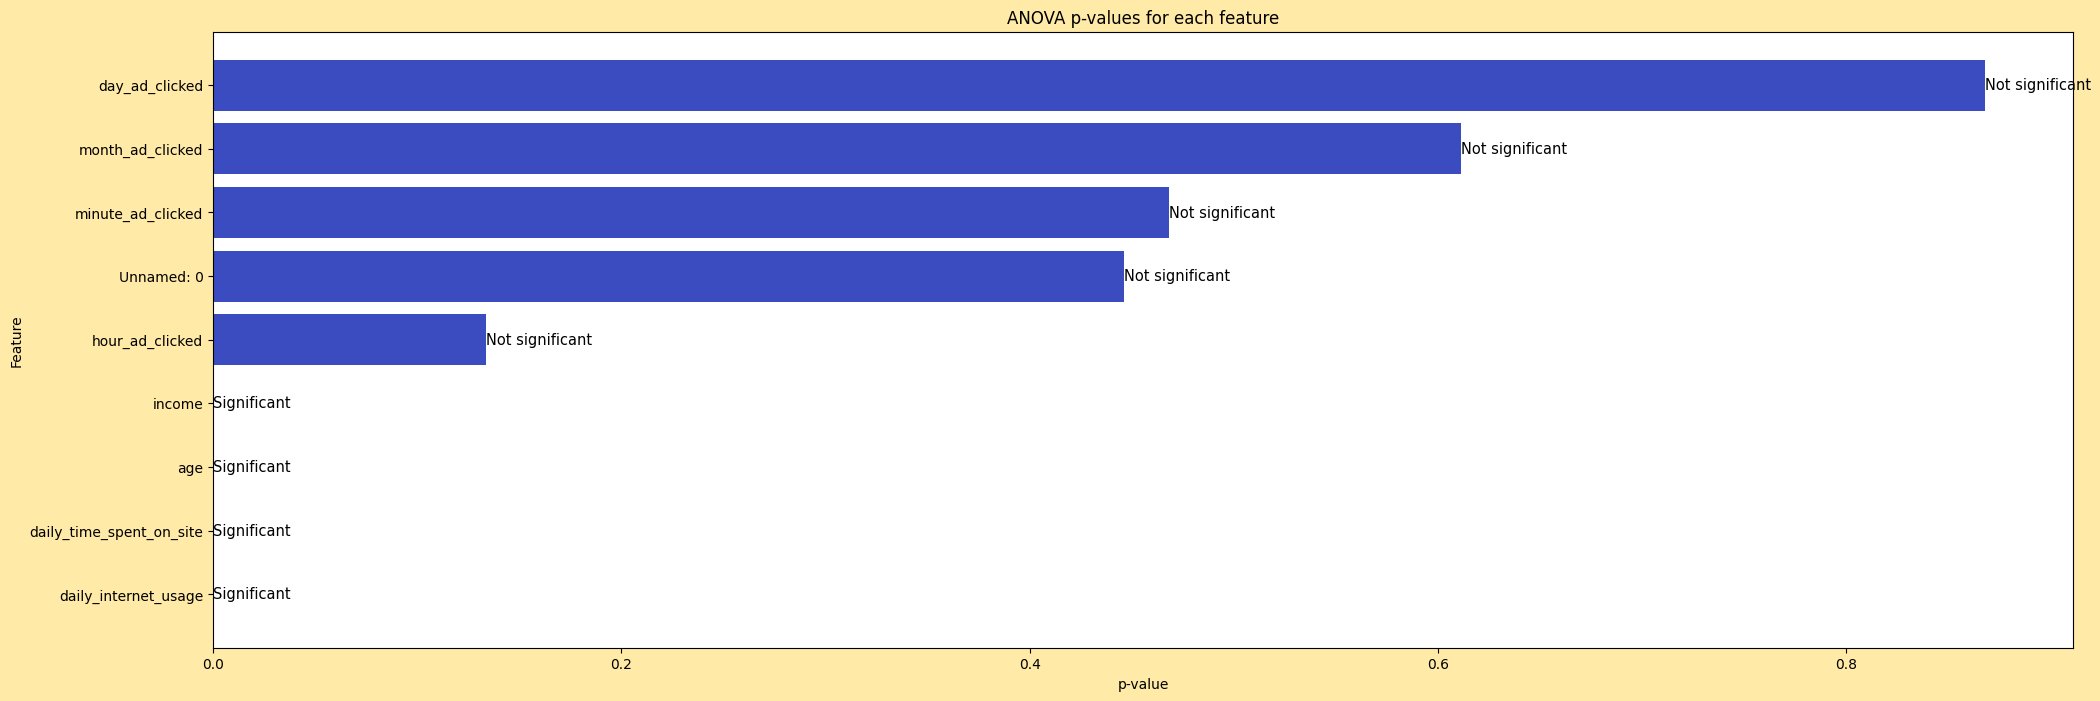

In [21]:
# Select numerical columns from the dataframe
num_cols = dfp.select_dtypes('number').columns

# Define the target variable
target = 'clicked_on_ad'

# Initialize a new dataframe to store ANOVA results
anova_df = pd.DataFrame(columns=['Feature', 'F-value', 'p-value'])

# Perform ANOVA for each numerical feature
for col in num_cols:
    # Group the data by target variable and convert each group to a list
    groups = dfp.groupby(target)[col].apply(list)
    
    # Perform one-way ANOVA and store the F-value and p-value
    f_val, p_val = f_oneway(*groups)
    
    # Append the results to the anova_df dataframe
    anova_df.loc[len(anova_df)] = [col, f_val, p_val]

# Sort the dataframe by the F-value and p-value in descending order
anova_df = anova_df.sort_values(['F-value', 'p-value'], ascending=False)

# Normalize the F-values for color mapping
norm = mcolors.Normalize(vmin=anova_df['F-value'].min(), vmax=anova_df['F-value'].max())

# Get the colormap
cmap = plt.get_cmap('coolwarm')

# Map the normalized F-values to the colormap
colors = cmap(norm(anova_df['F-value']))

# Plot the F-values
plt.figure(figsize=(22, 7), facecolor='#FFEAA7')
bars = plt.barh(anova_df['Feature'], anova_df['F-value'], color=colors)
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.title('ANOVA F-values for each feature')

# Add text to the bars indicating whether the feature is significant or not
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             'Significant' if anova_df.loc[i, 'p-value'] < 0.05 else 'Not Significant', 
             ha='left', va='center', fontsize=10.5)

# Plot the p-values
plt.figure(figsize=(24, 8), facecolor='#FFEAA7')
bars = plt.barh(anova_df['Feature'], anova_df['p-value'], color=colors)
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('ANOVA p-values for each feature')

# Add text to the bars indicating whether the feature is significant or not
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             'Significant' if width < 0.05 else 'Not significant', 
             ha='left', va='center', fontsize=10.5)

# Display the plots
plt.show()

A larger F-value indicates that a lot of the variation in the target variable can be explained by the feature variable. This suggests that the feature variable is statistically significant in relation to the target variable.<br>

A smaller F-value indicates that only a small amount of the variation in the target variable can be explained by the feature variable. This suggests that the feature variable is not statistically significant in relation to the target variable.

from the ANNOVA test result above, we can infer that:
- daily_internet_usage has the largest F-value (1607.901279), suggesting it contributes the most to the explanation of the variation in clicked_on_ad.<br><br>
- Unnamed: 0, month_ad_clicked, day_ad_clicked, hour_ad_clicked, and minute_ad_clicked have relatively small F-values, suggesting they do not contribute significantly to the explanation of the variation in clicked_on_ad.

In [22]:
# List of features to drop (not significant)
notsig_feats = [
    'Unnamed: 0', 
    'timestamp', 
    'ad_category', 
    'city', 
    'month_ad_clicked', 
    'gender',
    'day_ad_clicked',
    'hour_ad_clicked', 
    'minute_ad_clicked', 
    'is_weekend'
]

# Drop the specified columns from the dataframe
dfm = dfp.drop(notsig_feats, axis=1)

# Display the first few rows of the modified dataframe
dfm.head()

,daily_time_spent_on_site,age,income,daily_internet_usage,clicked_on_ad,province,age_group
0,68.95,35,432837300.0,256.09,No,DKI Jakarta,Young Adults
1,80.23,31,479092950.0,193.77,No,Bali,Young Adults
2,69.47,26,418501580.0,236.50,No,Jawa,Young Adults
3,74.15,29,383643260.0,245.89,No,Kepulauan Riau,Young Adults
4,68.37,35,517229930.0,225.58,No,Sumatra,Young Adults


#### Feature Encoding

In [23]:
# # Define a mapping for 'clicked_on_ad' column
# map_target = {
#     'Yes': 1,
#     'No': 0
# }

# # Apply the mapping to 'clicked_on_ad' column
# dfm['clicked_on_ad'] = dfm['clicked_on_ad'].map(map_target)

# # Perform one-hot encoding on 'gender' column and convert the result to integer
# gencode = pd.get_dummies(dfm['gender'], prefix='is').astype(int)

# # Perform one-hot encoding on 'province' column and convert the result to integer
# provincecode = pd.get_dummies(dfm['province'], prefix='province').astype(int)

# # Perform one-hot encoding on 'is_weekend' column and convert the result to integer
# # is_weekend = pd.get_dummies(dfm['is_weekend'], prefix='weekend').astype(int)

# # Concatenate the original DataFrame with the one-hot encoded DataFrames
# # dfm = pd.concat([dfm, gencode, provincecode, is_weekend], axis=1)

# # Drop the original 'gender', 'province', and 'is_weekend' columns
# # dfm.drop(['gender', 'province', 'is_weekend'], inplace=True, axis=1)
# dfm.drop(['gender', 'province'], inplace=True, axis=1)

# print('DataFrame after feature encoding:')
# display(dfm.head())

In [24]:
# Define a mapping for 'clicked_on_ad' column
map_target = {
    'Yes': 1,
    'No': 0
}

# Apply the mapping to 'clicked_on_ad' column
dfm['clicked_on_ad'] = dfm['clicked_on_ad'].map(map_target)

# Define mapping for 'age_group' column
map_age = {
    'Young Adults': 0,
    'Middle Adults': 1,
    'Old Adults': 2
}

# Apply the mapping to 'age_group' column
dfm['age_group'] = dfm['age_group'].map(map_age)

# Perform one-hot encoding on 'province' column and convert the result to integer
provincecode = pd.get_dummies(dfm['province'], prefix='province').astype(int)

# Concatenate the original DataFrame with the one-hot encoded DataFrames
dfm = pd.concat([dfm, provincecode], axis=1)

# Drop the original 'province' columns
dfm.drop(['province', 'age'], inplace=True, axis=1)

print('DataFrame after feature encoding:')
display(dfm.head())

DataFrame after feature encoding:


,daily_time_spent_on_site,income,daily_internet_usage,clicked_on_ad,age_group,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra
0,68.95,432837300.0,256.09,0,0,0,0,1,0,0,0,0,0,0
1,80.23,479092950.0,193.77,0,0,1,0,0,0,0,0,0,0,0
2,69.47,418501580.0,236.50,0,0,0,0,0,1,0,0,0,0,0
3,74.15,383643260.0,245.89,0,0,0,0,0,0,0,1,0,0,0
4,68.37,517229930.0,225.58,0,0,0,0,0,0,0,0,0,0,1


#### Split Data
in this train test split, i will use 70% of the data for training and 30% of the data for testing, because the data is not too big.

In [25]:
# Define the feature set X by dropping the target column 'clicked_on_ad' from the dataframe
X = dfm.drop('clicked_on_ad', axis=1)

# Define the target variable y as the 'clicked_on_ad' column from the dataframe
y = dfm['clicked_on_ad']

# Split the dataset into training and testing sets, with 70% of the data used for training and 30% for testing
# The random_state parameter ensures that the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1103)

# Print the shape of the training set to verify the split
print('X_train shape:', X_train.shape)

# Print the shape of the testing set to verify the split
print('\nX_test shape:', X_test.shape)

X_train shape: (700, 13)

X_test shape: (300, 13)


#### Update all preprocessing step to Validation data for Crossvalidate

In [26]:
X_val = dfe.copy().drop(columns='clicked_on_ad')
y_val = dfe[['clicked_on_ad']]

med_time = X_val['daily_time_spent_on_site'].median()
X_val['daily_time_spent_on_site'].fillna(med_time, inplace=True)

med_income = X_val['income'].median()
X_val['income'].fillna(med_income, inplace=True)

med_internet = X_val['daily_internet_usage'].median()
X_val['daily_internet_usage'].fillna(med_internet, inplace=True)

# handle categorical variables
mod_gen = X_val['gender'].mode()[0]
X_val['gender'].fillna(mod_gen, inplace=True)

X_val['age_group'] = np.select(age_group, age_binning)

X_val['province'] = X_val['province'].replace(province_mapping)

notsig_feats = [
    'Unnamed: 0', 'timestamp', 'ad_category', 'city', 'gender'
]

X_val = X_val.drop(notsig_feats, axis=1)

y_val['clicked_on_ad'] = y_val['clicked_on_ad'].map(map_target)

X_val['age_group'] = X_val['age_group'].map(map_age)

provincecode = pd.get_dummies(X_val['province'], prefix='province').astype(int)

X_val = pd.concat([X_val, provincecode], axis=1)

X_val.drop(['province', 'age'], inplace=True, axis=1)

### Task 3 - Data Modelling
**Task Goals** :<br> Develop a machine learning model to predict whether a customer will click on an ad.<br><br>
**Task Objective** :<br>
- Develop a machine learning model.
- Evaluate the model.


#### Model Selection & Evaluation (Before scaling the data)

In [27]:
def evaluate_model(model, X_train, y_train, X_test, y_test, X_val, threshold):
    """
    This function evaluates a given machine learninng model on training and testing data.

    Parameters:
    model (object): The machine learning model to be evaluated.
    X_train (DataFrame): Tje training data.
    y_train (series): The target labels for the training data.
    X_test (DataFrame): The testing data.
    y_test (series): The target labels for the testing data.
    X_val (DataFrame): The validation data for cross-validation.
    threshold (float): The probability threshold for the positive class in the ROC curve.

    Returns:
    dict: A dictionary of the model's training and testing scores

    Example:
    >>> model = LogisticRegression()
    >>> evaluate_model(model, X_train, y_train, X_test, y_test)
    """

    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the testing data
    y_test_pred = model.predict(X_test)
    
    # Predict probabilities of the positive class for the training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC score for the training and testing data
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)

    # Calculate the accuracy for the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_prob > threshold)
    test_accuracy = accuracy_score(y_test, y_test_prob > threshold)

    # Calculate the recall for the training and testing data
    train_recall = recall_score(y_train, y_train_prob > threshold)
    test_recall = recall_score(y_test, y_test_prob > threshold)

    # Calculate the precision for the training and testing data
    train_precision = precision_score(y_train, y_train_prob > threshold)
    test_precision = precision_score(y_test, y_test_prob > threshold)

    # Calculate the F1 score for the training and testing data
    train_f1 = f1_score(y_train, y_train_prob > threshold)
    test_f1 = f1_score(y_test, y_test_prob > threshold)
    
    # Perform cross-validation
    cv_score = cross_val_score(model, X_val, y_val, cv=5, scoring='roc_auc').mean()

    # Return a dictionary containing the model name and its performance metrics
    return {
        'model': model.__class__.__name__,
        'train_AUC': round(train_roc_auc, 2),
        'test_AUC': round(test_roc_auc, 2),
        'cross_val_AUC': round(cv_score, 2),
        'train_accuracy': round(train_accuracy, 2),
        'test_accuracy': round(test_accuracy, 2),
        'train_recall': round(train_recall, 2),
        'test_recall': round(test_recall, 2),
        'train_precision': round(train_precision, 2),
        'test_precision': round(test_precision, 2),
        'train_f1': round(train_f1, 2),
        'test_f1': round(test_f1, 2)
    }

In [28]:
lr = LogisticRegression(random_state=1103)
dt = DecisionTreeClassifier(random_state=1103)
rf = RandomForestClassifier(random_state=1103)
xgb = XGBClassifier(random_state=1103)

# List of models
models = [lr, dt, rf, xgb]

# Evaluate each model
results1 = [evaluate_model(model, X_train, y_train, X_test, y_test, X_val, 0.5) for model in models]

data_models1 = pd.DataFrame(results1)

# Define function to plot important metrics
def melt_n_plot(model_result, train_metrics, test_metrics):
    """
    This function takes a DataFrame of model results and two metrics,
    melts the DataFrame to a long format, and creates a barplot of the important metrics for each model.
    
    Parameters:
    model_result (pd.DataFrame): A DataFrame containing the results of different models.
    train_metrics (str): The name of the training metric column in the DataFrame.
    test_metrics (str): The name of the testing metric column in the DataFrame.

    Returns:
    None. Displays a bar plot of the metrics for each model.
    """
    # Melt the DataFrame to a long format for easier plotting
    data_melt = model_result.melt(id_vars='model', value_vars=[train_metrics, test_metrics])

    # Create a new figure with specified size and background color
    plt.figure(figsize=(15, 6), facecolor='#FFEAA7')

    # Create a bar plot of the metrics for each model
    sns.barplot(x='model', y='value', hue='variable', data=data_melt, palette='hls')

    # Set the labels and title of the plot
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Train Test {train_metrics} for each model')

    # Display the plot
    plt.show()

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,LogisticRegression,0.74,0.67,0.72,0.7,0.66,0.52,0.46,0.8,0.77,0.63,0.58
1,DecisionTreeClassifier,1.00,0.94,0.94,1.0,0.94,1.00,0.93,1.0,0.95,1.00,0.94
2,RandomForestClassifier,1.00,0.98,0.99,1.0,0.93,1.00,0.95,1.0,0.92,1.00,0.94
3,XGBClassifier,1.00,0.97,0.98,1.0,0.93,1.00,0.92,1.0,0.94,1.00,0.93


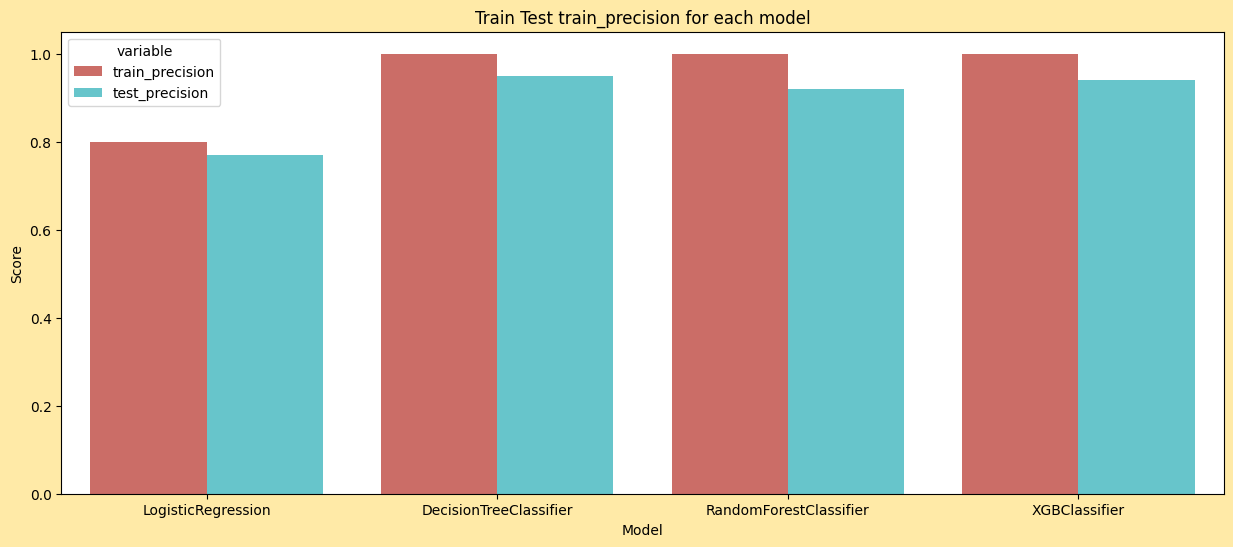

In [29]:
display(data_models1)

melt_n_plot(data_models1, 'train_precision', 'test_precision')

In [30]:
def plot_roc_curve(models_list, X_train, y_train, X_test, y_test):
    """
    This function takes a list of models, training and testing data, 
    fits each model, and plots the ROC curve for each model.

    Parameters:
    models_list (list): A list of instantiated models.
    X_train (pd.DataFrame): The training data.
    y_train (pd.Series): The training labels.
    X_test (pd.DataFrame): The testing data.
    y_test (pd.Series): The testing labels.

    Returns:
    None. Displays a plot of the ROC curve for each model.
    """
    # Create a new figure with specified size and background color
    plt.figure(figsize=(10, 6), facecolor='#FFEAA7')

    # Fit each model and plot the ROC curve
    for model in models_list:
        model.fit(X_train, y_train)
        y_test_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        plt.plot(fpr, tpr, label=model.__class__.__name__)

    # Plot the ROC curve for a random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')

    # Add labels and title to the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Display the plot
    plt.show()

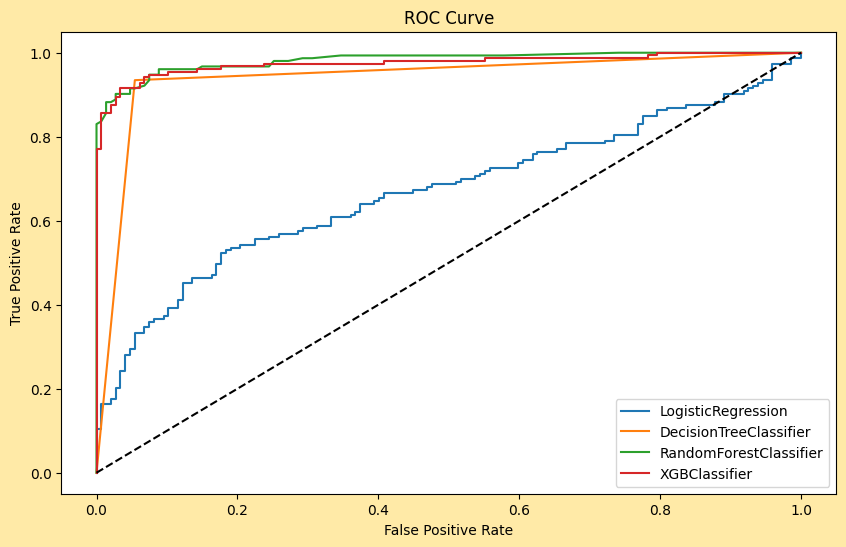

In [31]:
plot_roc_curve(models, X_train, y_train, X_test, y_test)

Based on the provided metrics, here's a summary of the model results:

1. **Logistic Regression**: This model has a moderate performance with a training accuracy of 70% and a test accuracy of 66%. The Area Under the Curve (AUC) for the training set is 0.74 and for the test set is 0.67. The precision, recall, and F1 score are all lower for the test set compared to the training set, indicating that the model may be overfitting to the training data.

2. **Decision Tree Classifier**: This model perfectly fits the training data with an accuracy of 100%. The test accuracy is 94%, and the AUC for the test set is 0.94. The precision, recall, and F1 score are all above 93% for the test set, indicating a high performance.

3. **Random Forest Classifier**: This model also perfectly fits the training data with an accuracy of 100%. The test accuracy is 93%, and the AUC for the test set is 0.98. The precision, recall, and F1 score are all above 92% for the test set, indicating a high performance.

4. **XGBoost Classifier**: This model perfectly fits the training data with an accuracy of 100%. The test accuracy is 93%, and the AUC for the test set is 0.97. The precision, recall, and F1 score are all above 92% for the test set, indicating a high performance.

In summary, the Decision Tree, Random Forest, and XGBoost classifiers all perform very well on this dataset, with high accuracy, precision, recall, and F1 scores on the test set. The Logistic Regression model has moderate performance.

#### Feature Scaling
I use StandardScaler from sklearn.preprocessing to scale the data.

In [32]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

print('Scaled Training Data:')
display(X_train_scaled)
print('\nScaled Testing Data:')
display(X_test_scaled)

Scaled Training Data:


,daily_time_spent_on_site,income,daily_internet_usage,age_group,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra
0,0.513839,0.700082,0.714229,-0.875418,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,4.009136,-0.188422,-0.184319,-0.343818
1,-1.208658,-0.345368,-1.257807,-0.875418,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818
2,0.338799,-0.640786,1.863120,-0.875418,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.249430,5.307228,-0.184319,-0.343818
3,-0.458395,-0.523576,-1.646469,0.724562,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.249430,5.307228,-0.184319,-0.343818
4,0.707271,-0.648456,1.117480,-0.875418,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.025007,0.604075,1.213905,0.724562,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818
696,0.747226,0.960870,0.296844,-0.875418,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818
697,0.194200,-2.181549,-0.403661,0.724562,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818
698,1.200682,0.985327,0.338104,0.724562,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.249430,-0.188422,-0.184319,-0.343818



Scaled Testing Data:


,daily_time_spent_on_site,income,daily_internet_usage,age_group,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa,province_Kalimantan,province_Kepulauan Riau,province_Lampung,province_Sulawesi Selatan,province_Sumatra
0,0.148538,-0.338062,-1.654904,0.724562,-0.126353,3.530090,-0.553146,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818
1,-0.599188,-1.970444,0.747510,-0.875418,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818
2,-1.750268,-1.888703,-0.271903,0.724562,-0.126353,-0.283279,-0.553146,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,2.908515
3,-1.622159,0.773424,-0.371747,0.724562,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818
4,1.183558,0.694869,0.927594,0.724562,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.491513,0.928600,-0.478202,0.724562,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818
296,-0.208519,-1.712272,-1.483938,-0.875418,-0.126353,-0.283279,-0.553146,1.285113,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818
297,0.593749,0.681811,-0.381549,-0.875418,-0.126353,-0.283279,-0.553146,-0.778142,3.727414,-0.24943,-0.188422,-0.184319,-0.343818
298,-1.892329,-0.254007,-0.587848,0.724562,-0.126353,-0.283279,1.807842,-0.778142,-0.268282,-0.24943,-0.188422,-0.184319,-0.343818


In [33]:
val_scaler = StandardScaler()
X_val_scaled = pd.DataFrame(val_scaler.fit_transform(X_val))
X_val_scaled.columns = X_val.columns

#### Model Selection & Evaluation (After scaling the data)

In [34]:
# Evaluate each model
results2 = [evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, 0.5) for model in models]

# Convert the results to a DataFrame
df_models2 = pd.DataFrame(results2)

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,LogisticRegression,0.99,0.99,0.99,0.97,0.95,0.97,0.94,0.98,0.97,0.97,0.95
1,DecisionTreeClassifier,1.00,0.94,0.94,1.00,0.94,1.00,0.93,1.00,0.95,1.00,0.94
2,RandomForestClassifier,1.00,0.98,0.99,1.00,0.93,1.00,0.95,1.00,0.92,1.00,0.94
3,XGBClassifier,1.00,0.97,0.98,1.00,0.93,1.00,0.92,1.00,0.94,1.00,0.93


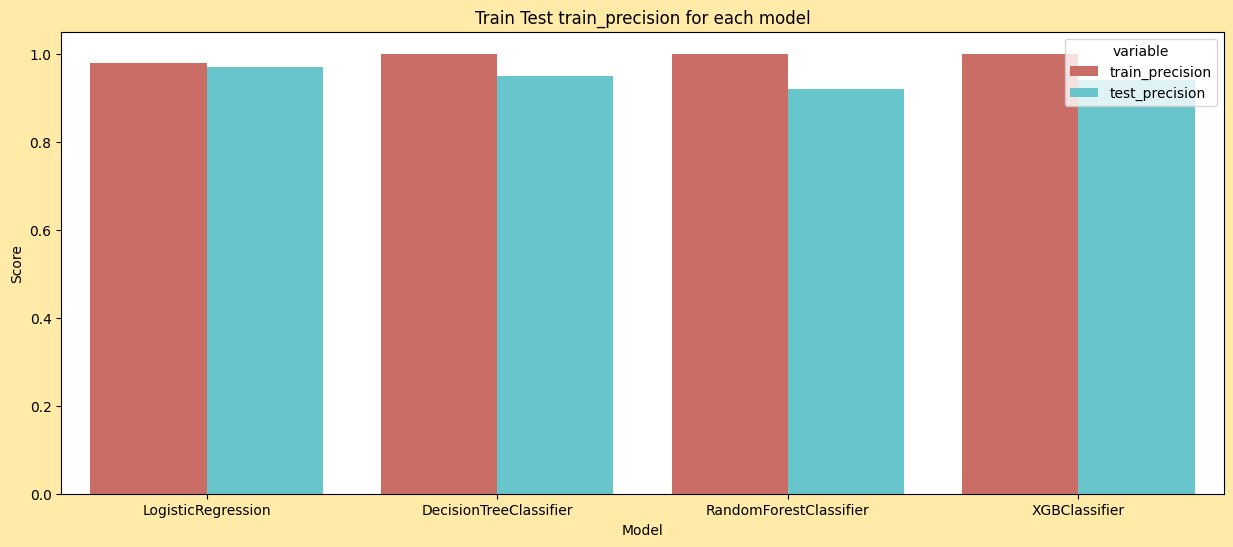

In [35]:
display(df_models2)

melt_n_plot(df_models2, 'train_precision', 'test_precision')

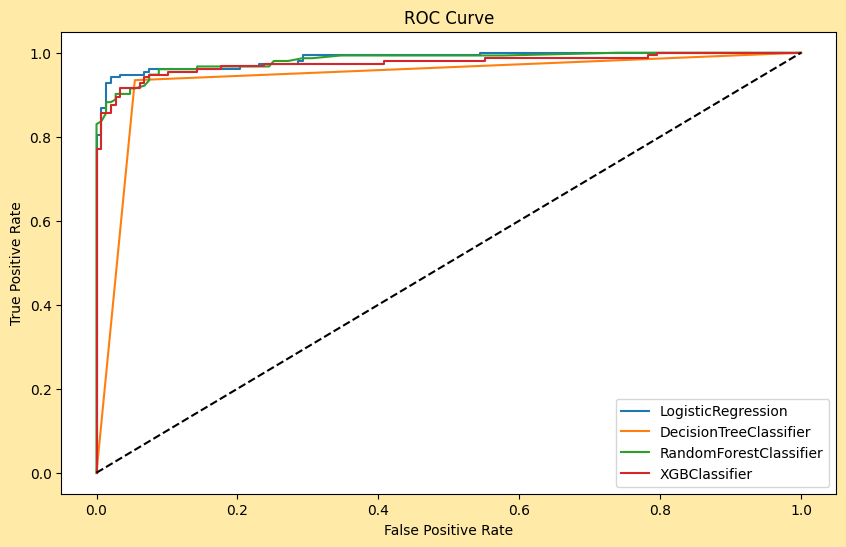

In [36]:
plot_roc_curve(models, X_train_scaled, y_train, X_test_scaled, y_test)

Based on the provided metrics after scaling the data, here's a summary of the model results:

1. **Logistic Regression**: This performance of this model has significantly improved after scaling the data. The training accuracy is now 97% and the test accuracy is now 97% and the test accuracy os 95%. The Area Under the Curve (AUC) for both the training and test sets is 0.99. The precision, recall, and F1 score are all above 94% for both the training and test sets, indicating a High performance.

2. **Decision Tree Classifier**: The performance of this model remains the same after scaling the data. It perfectly fits the training data with an accuracy of 100%. The test accuracy is 94%, and the AUC for the test set is 0.94. The precision, recall, and F1 score are all above 93% for the test set, indicating a high performance.

3. **Random Forest Classifier**: The performance of this model remains the same after scaling the data. It perfectly fits the training data with an accuracy of 100%. The test accuracy is 93%, and the AUC for the test set is 0.98. The precision, recall, and F1 score are all above 92% for the test set, indicating a high performance.

4. **XGBoost Classifier**: The performance of this model remains the same after scaling the data. It perfectly fits the training data with an accuracy of 100%. The test accuracy is 93%, and the AUC for the test set is 0.97. The precision, recall, and F1 score are all above 92% for the test set, indicating a high performance.

In summary, the Logistic Regression model has significantly improved performance after scaling the data, with high accuracy, precision, recall, and F1 scores on the test set. The Decision Tree, Random Forest, and XGBoost classifiers all perform very well on this dataset, with high accuracy, precision, recall, and F1 scores on the test set.

#### Feature Importance Logistic Regression

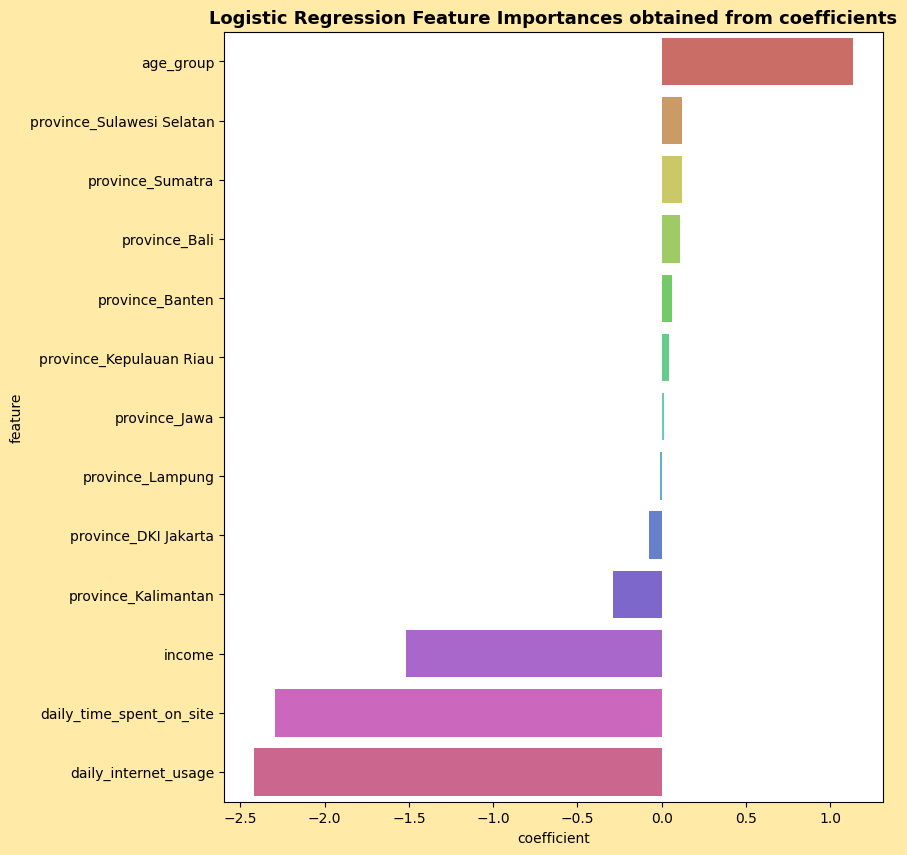

In [37]:
# Get the feature importances from Logistic Regression
importances = lr.coef_[0]

# Create a DataFrame to store the feature importances
importances_data = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': importances
})

# Sort the DataFrame by feature importance
importances_data = importances_data.sort_values('coefficient', ascending=False)

# PLot the feature iomportances
plt.figure(figsize=(8.5, 10), facecolor='#FFEAA7')
sns.barplot(x='coefficient', y='feature', data=importances_data, palette='hls')
plt.title('Logistic Regression Feature Importances obtained from coefficients', fontsize=13, fontweight='bold')
plt.show()

The feature importances from our Logistic Regression model are represented by the coefficients of the features. The magnitude of the coefficient indicates the importance of the feature, while the sign of the coefficient (+ or -) indicates the direction of the relationship.<br>

Here's the interpretation of top feature importances from our Logistic Regression Model:
- The most important feature in predicting whether a customer will click on an ad is `daily_internet_usage`, with a coefficient of -2.42 (negative coefficient means that as the feature value increases, the probability of clicking on an ad decreases).

- followed by `daily_time_spent_on_site` with a coefficient of -2.3 (negative coefficient means that as the feature value increases, the probability of clicking on an ad decreases).

- `income` with a coefficient of -1.52 (negative coefficient means that as the feature value increases, the probability of clicking on an ad decreases).

- and `age_group` with a coefficient of 1.13 (positive coefficient means that as the feature value increases, the probability of clicking on an ad increases).

#### Confusion Matrix Logistic Regression

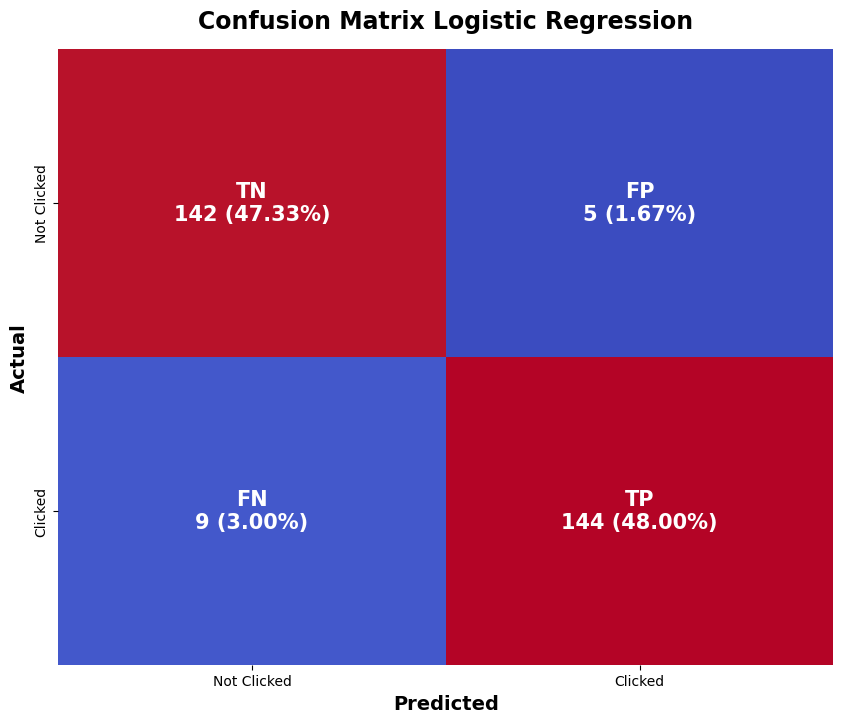

In [38]:
y_pred = lr.predict(X_test_scaled)

# Create a confusion matrix
cmatrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each value in the confusion matrix
cmatix_pct = cmatrix / cmatrix.sum()

# Define the labels 
labels = np.array([['TN', 'FP'],
                   ['FN', 'TP']])

    # Create labels with the percentage values
labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                      for label, value, percentage in zip(labels.flatten(), cmatrix.flatten(), cmatix_pct.flatten())])
                      ).reshape(2,2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,8))

sns.heatmap(
    cmatrix,
    annot=labels,
    fmt='',
    cmap='coolwarm',
    cbar=False,
    annot_kws={'size': 15, 'weight': 'bold'},
    xticklabels=['Not Clicked', 'Clicked'],
    yticklabels=['Not Clicked', 'Clicked']
)

plt.title('Confusion Matrix Logistic Regression', fontsize=17, fontweight='bold', y=1.02)
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.show()

Logistic Regression Confusion matrix interpretation:<br>
- **True Positive (TP) - 144**<br>These are the clicks that the model correctly predicted. The model identified these customers as likely to click, and they indeed clicked on the ad.

- **False Positive (FP) - 5**<br>These are the clicks that the model incorrectly predicted. The model identified these customers as likely to click, but they did not click on the ad. These represent wasted ad impressions.

- **True Negative (TN) - 142**<br>These are the customers who the model correctly predicted would not click, and they did not click. The model identified these customers as unlikely to click, and they did not click, saving the company ad costs.

- **False Negative (FN) - 9**<br>These are the missed clicks that the model incorrectly predicted. The model identified these customers as unlikely to click, but they actually did click on the ad. These represent potential revenue losses.

## Task 4 - Business Impact Simulation and Business Recommendations

**Task Goals** :<br> Simulate the business impact of the model and provide recommendations based on the findings.<br><br>
**Task Objective** :<br>
- Simulate the business impact of the model.
- Provide recommendations based on the findings.

#### Business Impact Simulation

In [39]:
# Model performance metrics
TP = 144
FP = 5
TN = 142
FN = 9

# Assumption 
cost_per_ad = 15000
revenue_per_click = 50000

# Total test set
total_test_set = TP + TN + FP + FN

# Calculate cost, revenue and profit before machine learning
total_cost_b4 = total_test_set * cost_per_ad
total_rev_b4 = (total_test_set/2) * revenue_per_click
total_profit_b4 = total_rev_b4 - total_cost_b4
ctr_b4 = ((total_test_set / 2) / total_test_set) * 100

# Calculate cost, revenue, nad profit after machine learning
# After model developed we only focus on advertising potential customer
potential_customer = TP + FP
total_cost_aft = potential_customer * cost_per_ad
miss_potential_rev = FN * revenue_per_click
total_rev_aft = TP * revenue_per_click - miss_potential_rev
total_profit_aft = total_rev_aft - total_cost_aft
ctr_aft = (TP / potential_customer) * 100

# Print before model calculation
print(f'Total Cost Before Model: {total_cost_b4}') 
print(f'Total Revenue Before Model: {total_rev_b4}') 
print(f'Total Profit Before Model: {total_profit_b4}\n')
print(f'Click Through Rate Before Model: {ctr_b4:.2f}%')

# Print after model calculation
print(f'Total Cost After Model: {total_cost_aft}')
print(f'Total Revenue After Model: {total_rev_aft}')
print(f'Total Profit After Model: {total_profit_aft}')
print(f'Click Through Rate After Model: {ctr_aft:.2f}%')

# Calculate Profit Increase 
profit_increase_pct = ((total_profit_aft - total_profit_b4) / total_profit_b4) * 100

# Print the results
print(f'\nProfit Increase: {profit_increase_pct:.2f}%')

Total Cost Before Model: 4500000
Total Revenue Before Model: 7500000.0
Total Profit Before Model: 3000000.0

Click Through Rate Before Model: 50.00%
Total Cost After Model: 2235000
Total Revenue After Model: 6750000
Total Profit After Model: 4515000
Click Through Rate After Model: 96.64%

Profit Increase: 50.50%


#### Business Recommendations

Business Recomendations Based on the Feature importances Logistic Regression Model:

1. Targeting Strategy:

- Focus on Less Frequent Internet Users: Since daily_internet_usage has the highest negative coefficient, prioritize targeting customers who use the internet less frequently. This could involve exploring alternative advertising channels like TV, print, or social media platforms frequented by less internet-savvy demographics.

2. Content Strategy:

- Shorter and Engaging On-Site Content:  The negative coefficient of daily_time_spent_on_site suggests that users with limited attention spans are less likely to click on ads. Consider creating shorter, more engaging website content that quickly captures user attention and motivates clicks. This could involve bite-sized infographics, short videos, or interactive elements.

- Personalization based on Usage:  Explore personalizing the ad content or website experience based on a user's internet usage patterns.  For example, if a user shows signs of limited internet usage, present a more simplified and direct ad message that focuses on the core benefits of our product or service.

3. Re-engagement Strategy:

- Target Disengaged Users: The negative coefficients for internet usage and site time might also indicate a segment of disengaged users. Develop targeted re-engagement campaigns (emails, pop-ups) for these users to bring them back to your platform and potentially convert them into clicking customers.

4. Optimize Marketing for a Specific Age Range:

- Companies can allocate marketing resources more efficiently by focusing on specific age ranges that respond positively to advertising. This reduces the waste of resources on less responsive age segments while increasing the opportunity to get better results from marketing investments.